In [96]:
'''
ML Project for Module:
BAA10127 - Data Analytics: Machine Learning & Advanced Python
Student No. 21311696
Student Name: Rory James Mulhern
Course: BSI4
Dataset: https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data
'''

'\nML Project for Module:\nBAA10127 - Data Analytics: Machine Learning & Advanced Python\nStudent No. 21311696\nStudent Name: Rory James Mulhern\nCourse: BSI4\nDataset: https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data\n'

In [97]:
# Importing Libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import roc_curve, auc
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

In [98]:
# Linking file to Code
filepath = '/Users/mulhr/Desktop/ML Project/loan_data.csv'

# Importing the dataset
loans_df = pd.read_csv(filepath)

loans_df

person_age person_gender person_education  person_income  \
0            22.0        female           Master        71948.0   
1            21.0        female      High School        12282.0   
2            25.0        female      High School        12438.0   
3            23.0        female         Bachelor        79753.0   
4            24.0          male           Master        66135.0   
...           ...           ...              ...            ...   
44995        27.0          male        Associate        47971.0   
44996        37.0        female        Associate        65800.0   
44997        33.0          male        Associate        56942.0   
44998        29.0          male         Bachelor        33164.0   
44999        24.0          male      High School        51609.0   

       person_emp_exp person_home_ownership  loan_amnt        loan_intent  \
0                   0                  RENT    35000.0           PERSONAL   
1                   0                   OWN     1000.0          EDUCATION   
2                   3              MORTGAGE     5500.0            MEDICAL   
3                   0                  RENT    35000.0            MEDICAL   
4                   1                  RENT    35000.0            MEDICAL   
...               ...                   ...        ...                ...   
44995               6                  RENT    15000.0            MEDICAL   
44996              17                  RENT     9000.0    HOMEIMPROVEMENT   
44997               7                  RENT     2771.0  DEBTCONSOLIDATION   
44998               4                  RENT    12000.0          EDUCATION   
44999               1                  RENT     6665.0  DEBTCONSOLIDATION   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
0              16.02                 0.49                         3.0   
1              11.14                 0.08                         2.0   
2              12.87                 0.44                         3.0   
3              15.23                 0.44                         2.0   
4              14.27                 0.53                         4.0   
...              ...                  ...                         ...   
44995          15.66                 0.31                         3.0   
44996          14.07                 0.14                        11.0   
44997          10.02                 0.05                        10.0   
44998          13.23                 0.36                         6.0   
44999          17.05                 0.13                         3.0   

       credit_score previous_loan_defaults_on_file  loan_status  
0               561                             No            1  
1               504                            Yes            0  
2               635                             No            1  
3               675                             No            1  
4               586                             No            1  
...             ...                            ...          ...  
44995           645                             No            1  
44996           621                             No            1  
44997           668                             No            1  
44998           604                             No            1  
44999           628                             No            1  

[45000 rows x 14 columns]

In [99]:
# Youssef Elbadry Accessed: 9th April 2025

# Looking at info on the data
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [100]:
# Changing the person_age column to an integer
loans_df['person_age'] = loans_df['person_age'].astype(int)

# Looking at info on the data
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  int64  
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [101]:
# Removing duplicate rows
loans_df.drop_duplicates(inplace=True)

# Check if there are any duplicates left
duplicate_count = loans_df.duplicated().sum()

# Display final check
if duplicate_count == 0:
    print("No duplicate values in the dataset.")
else:
    print(f"Total duplicate values remaining: {duplicate_count}")

No duplicate values in the dataset.


In [102]:
# Looking at the data description see the statistics of numeric columns
loans_df.describe().T

count          mean           std      min  \
person_age                  45000.0     27.764178      6.045108    20.00   
person_income               45000.0  80319.053222  80422.498632  8000.00   
person_emp_exp              45000.0      5.410333      6.063532     0.00   
loan_amnt                   45000.0   9583.157556   6314.886691   500.00   
loan_int_rate               45000.0     11.006606      2.978808     5.42   
loan_percent_income         45000.0      0.139725      0.087212     0.00   
cb_person_cred_hist_length  45000.0      5.867489      3.879702     2.00   
credit_score                45000.0    632.608756     50.435865   390.00   
loan_status                 45000.0      0.222222      0.415744     0.00   

                                 25%       50%       75%         max  
person_age                     24.00     26.00     30.00      144.00  
person_income               47204.00  67048.00  95789.25  7200766.00  
person_emp_exp                  1.00      4.00      8.00      125.00  
loan_amnt                    5000.00   8000.00  12237.25    35000.00  
loan_int_rate                   8.59     11.01     12.99       20.00  
loan_percent_income             0.07      0.12      0.19        0.66  
cb_person_cred_hist_length      3.00      4.00      8.00       30.00  
credit_score                  601.00    640.00    670.00      850.00  
loan_status                     0.00      0.00      0.00        1.00

In [103]:
# Youssef Elbadry Accessed: 9th April 2025

# Seeing which columns are Categorical and Numerical
cat_cols = [var for var in loans_df.columns if loans_df[var].dtypes == 'object']
num_cols = [var for var in loans_df.columns if loans_df[var].dtypes != 'object']

print(f'Categorical columns: {cat_cols}')
print(f'Numerical columns: {num_cols}')

Categorical columns: ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']
Numerical columns: ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_status']


In [104]:
cat_cols

['person_gender',
 'person_education',
 'person_home_ownership',
 'loan_intent',
 'previous_loan_defaults_on_file']

In [105]:
# Seeing the split in gender
loans_df['person_gender'].value_counts()

person_gender
male      24841
female    20159
Name: count, dtype: int64

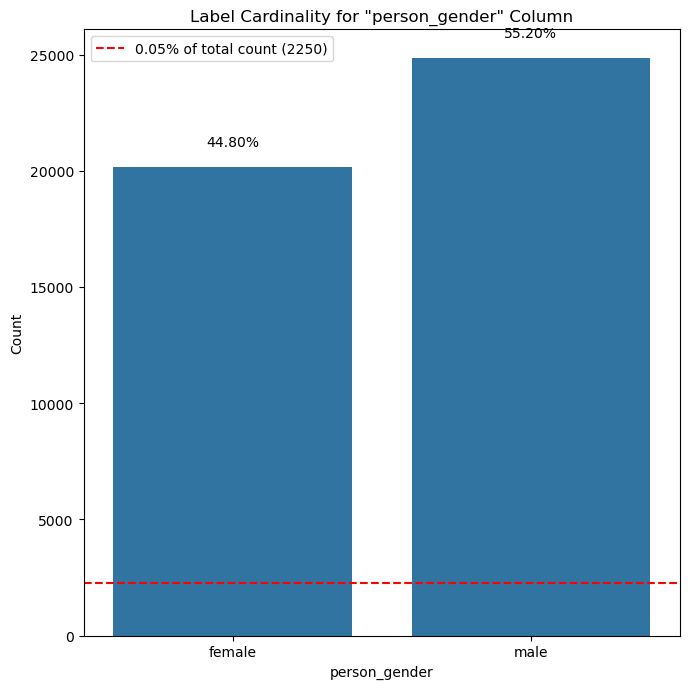

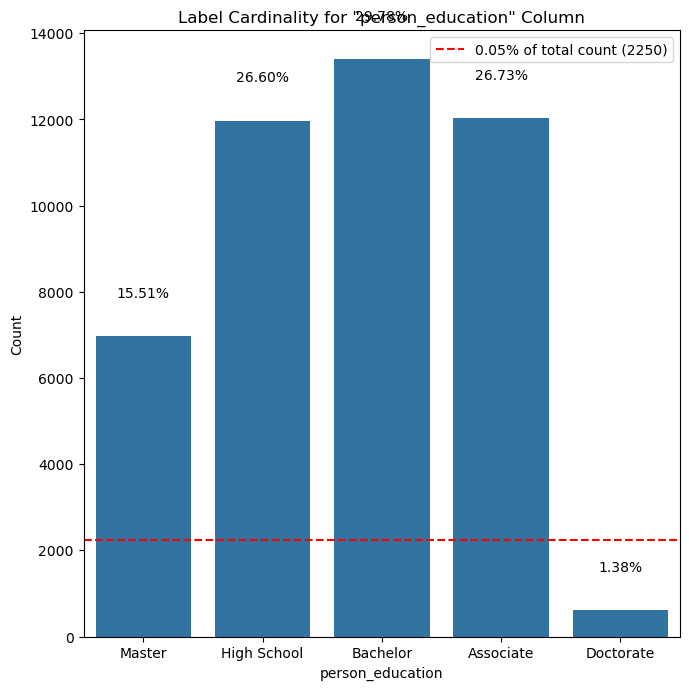

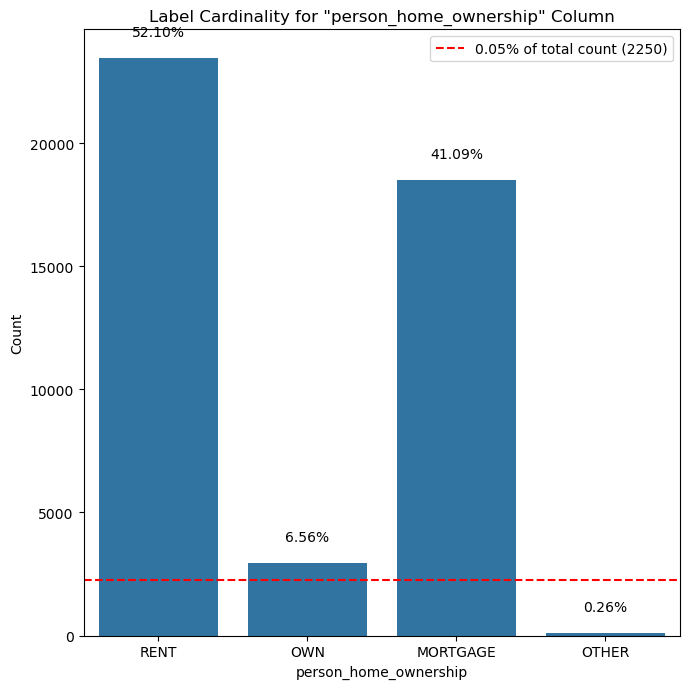

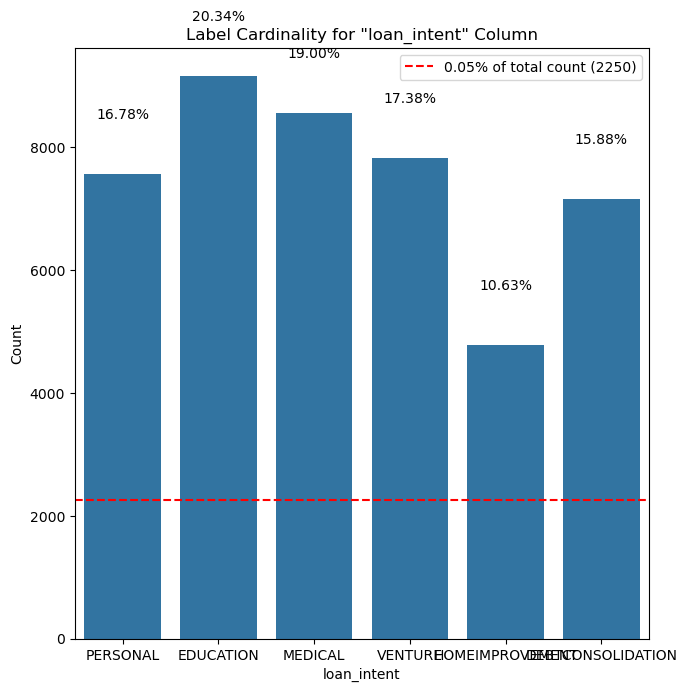

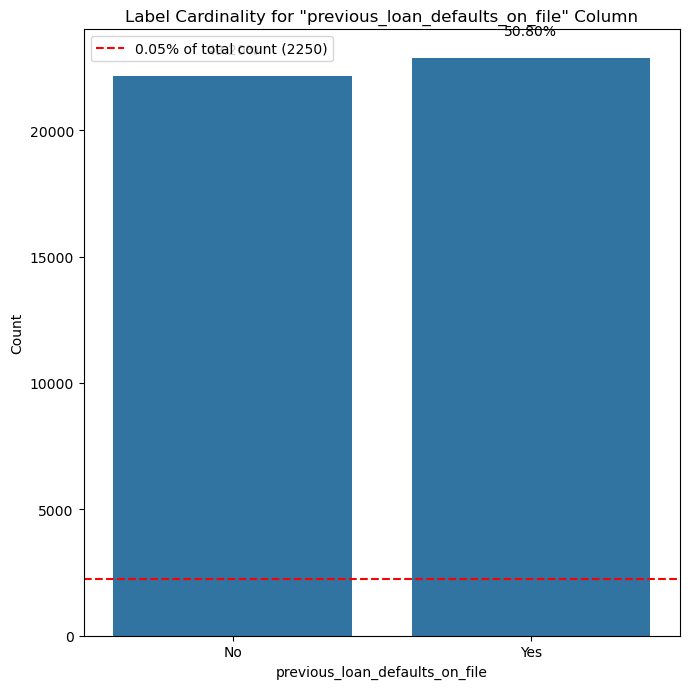

In [106]:
# Youssef Elbadry Accessed: 9th April 2025
def plot_categorical_column(dataframe, column):

    plt.figure(figsize=(7, 7))
    ax = sns.countplot(x=dataframe[column])
    total_count = len(dataframe[column])
    threshold = 0.05 * total_count
    category_counts = dataframe[column].value_counts(normalize=True) * 100
    ax.axhline(threshold, color='red', linestyle='--', label=f'0.05% of total count ({threshold:.0f})')
    
    for p in ax.patches:
        height = p.get_height()
        percentage = (height / total_count) * 100
        ax.text(p.get_x() + p.get_width() / 2., height + 0.02 * total_count, f'{percentage:.2f}%', ha="center")
    
    plt.title(f'Label Cardinality for "{column}" Column')
    plt.ylabel('Count')
    plt.xlabel(column)
    plt.tight_layout()
    
    plt.legend()
    plt.show()

for col in cat_cols:
    plot_categorical_column(loans_df, col)

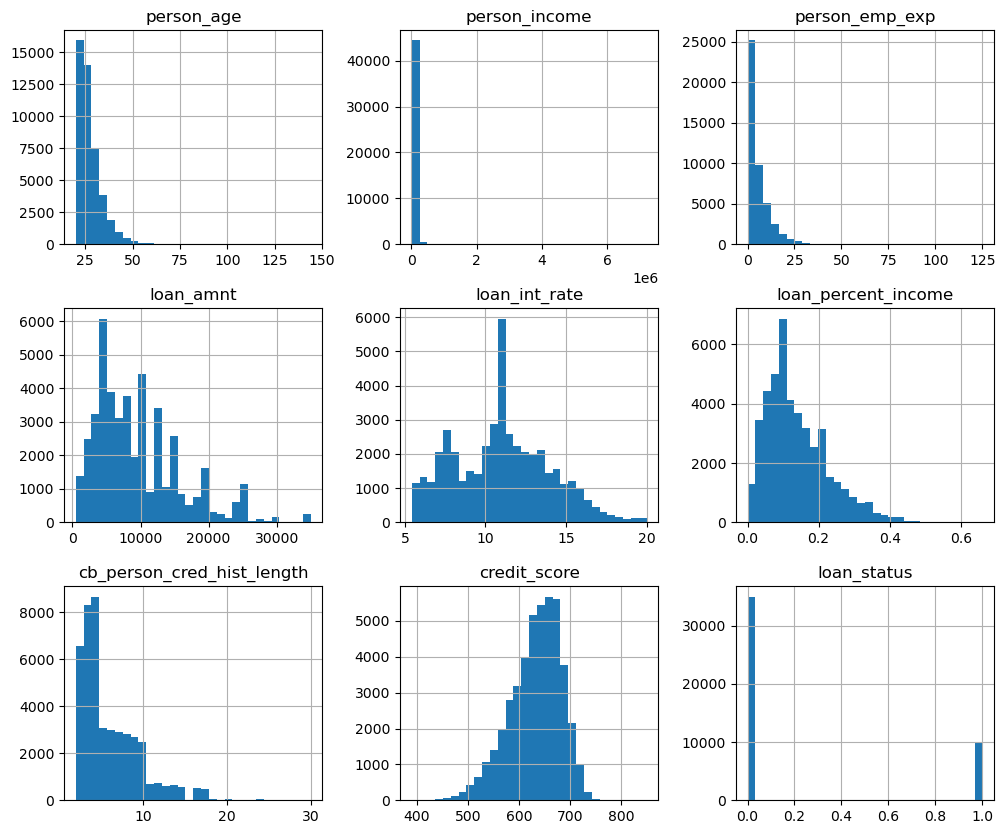

In [107]:
loans_df[num_cols].hist(bins=30, figsize=(12,10))
plt.show()

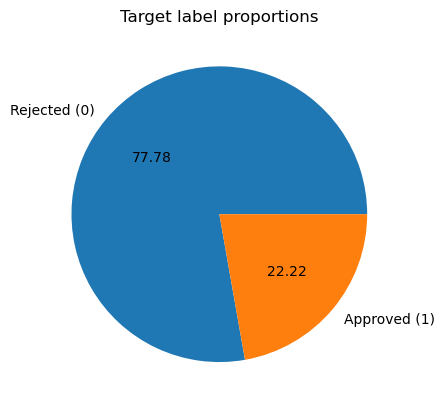

In [108]:

label_prop = loans_df['loan_status'].value_counts()

plt.pie(label_prop.values, labels=['Rejected (0)', 'Approved (1)'], autopct='%.2f')
plt.title('Target label proportions')
plt.show()

In [109]:
'''
Article saying most lenders will not lend to anyone above 70
https://www.moneysupermarket.com/loans/loans-for-pensioners/#:~:text=Most%20lenders%20have%20a%20maximum,beyond%20this%20age%20is%20rare.
'''
loans_df = loans_df[loans_df['person_age']<= 70]
print('Ages above 70 removed!')

Ages above 70 removed!


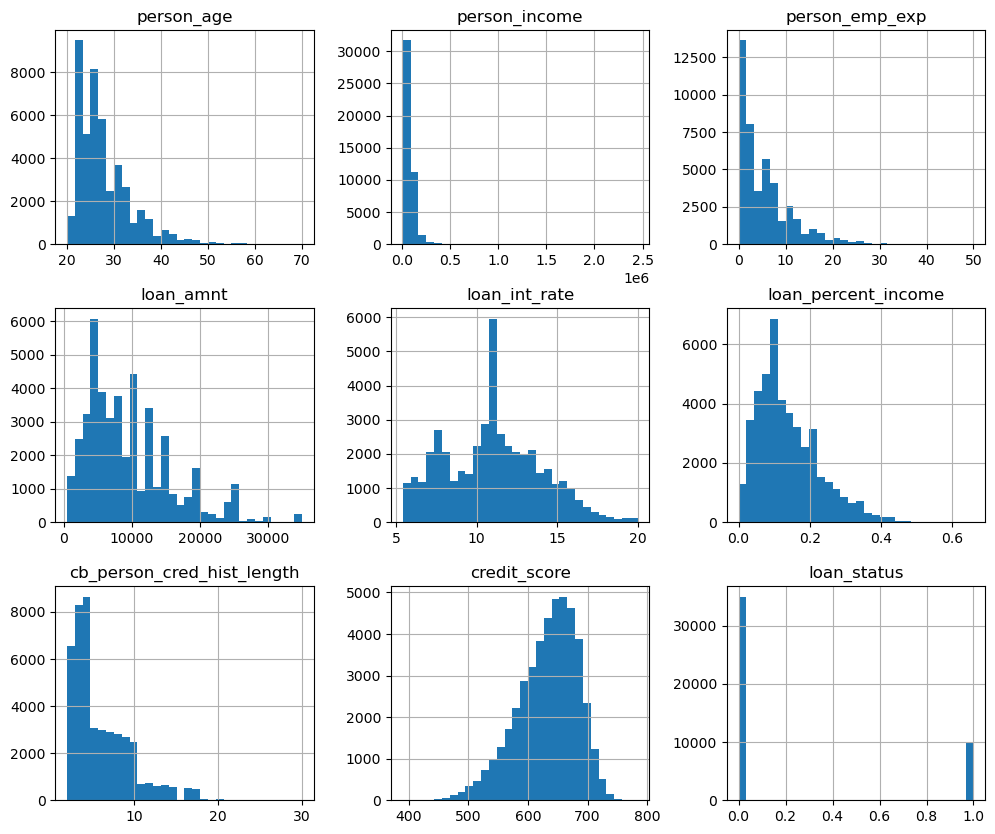

In [110]:
loans_df[num_cols].hist(bins=30, figsize=(12,10))
plt.show()

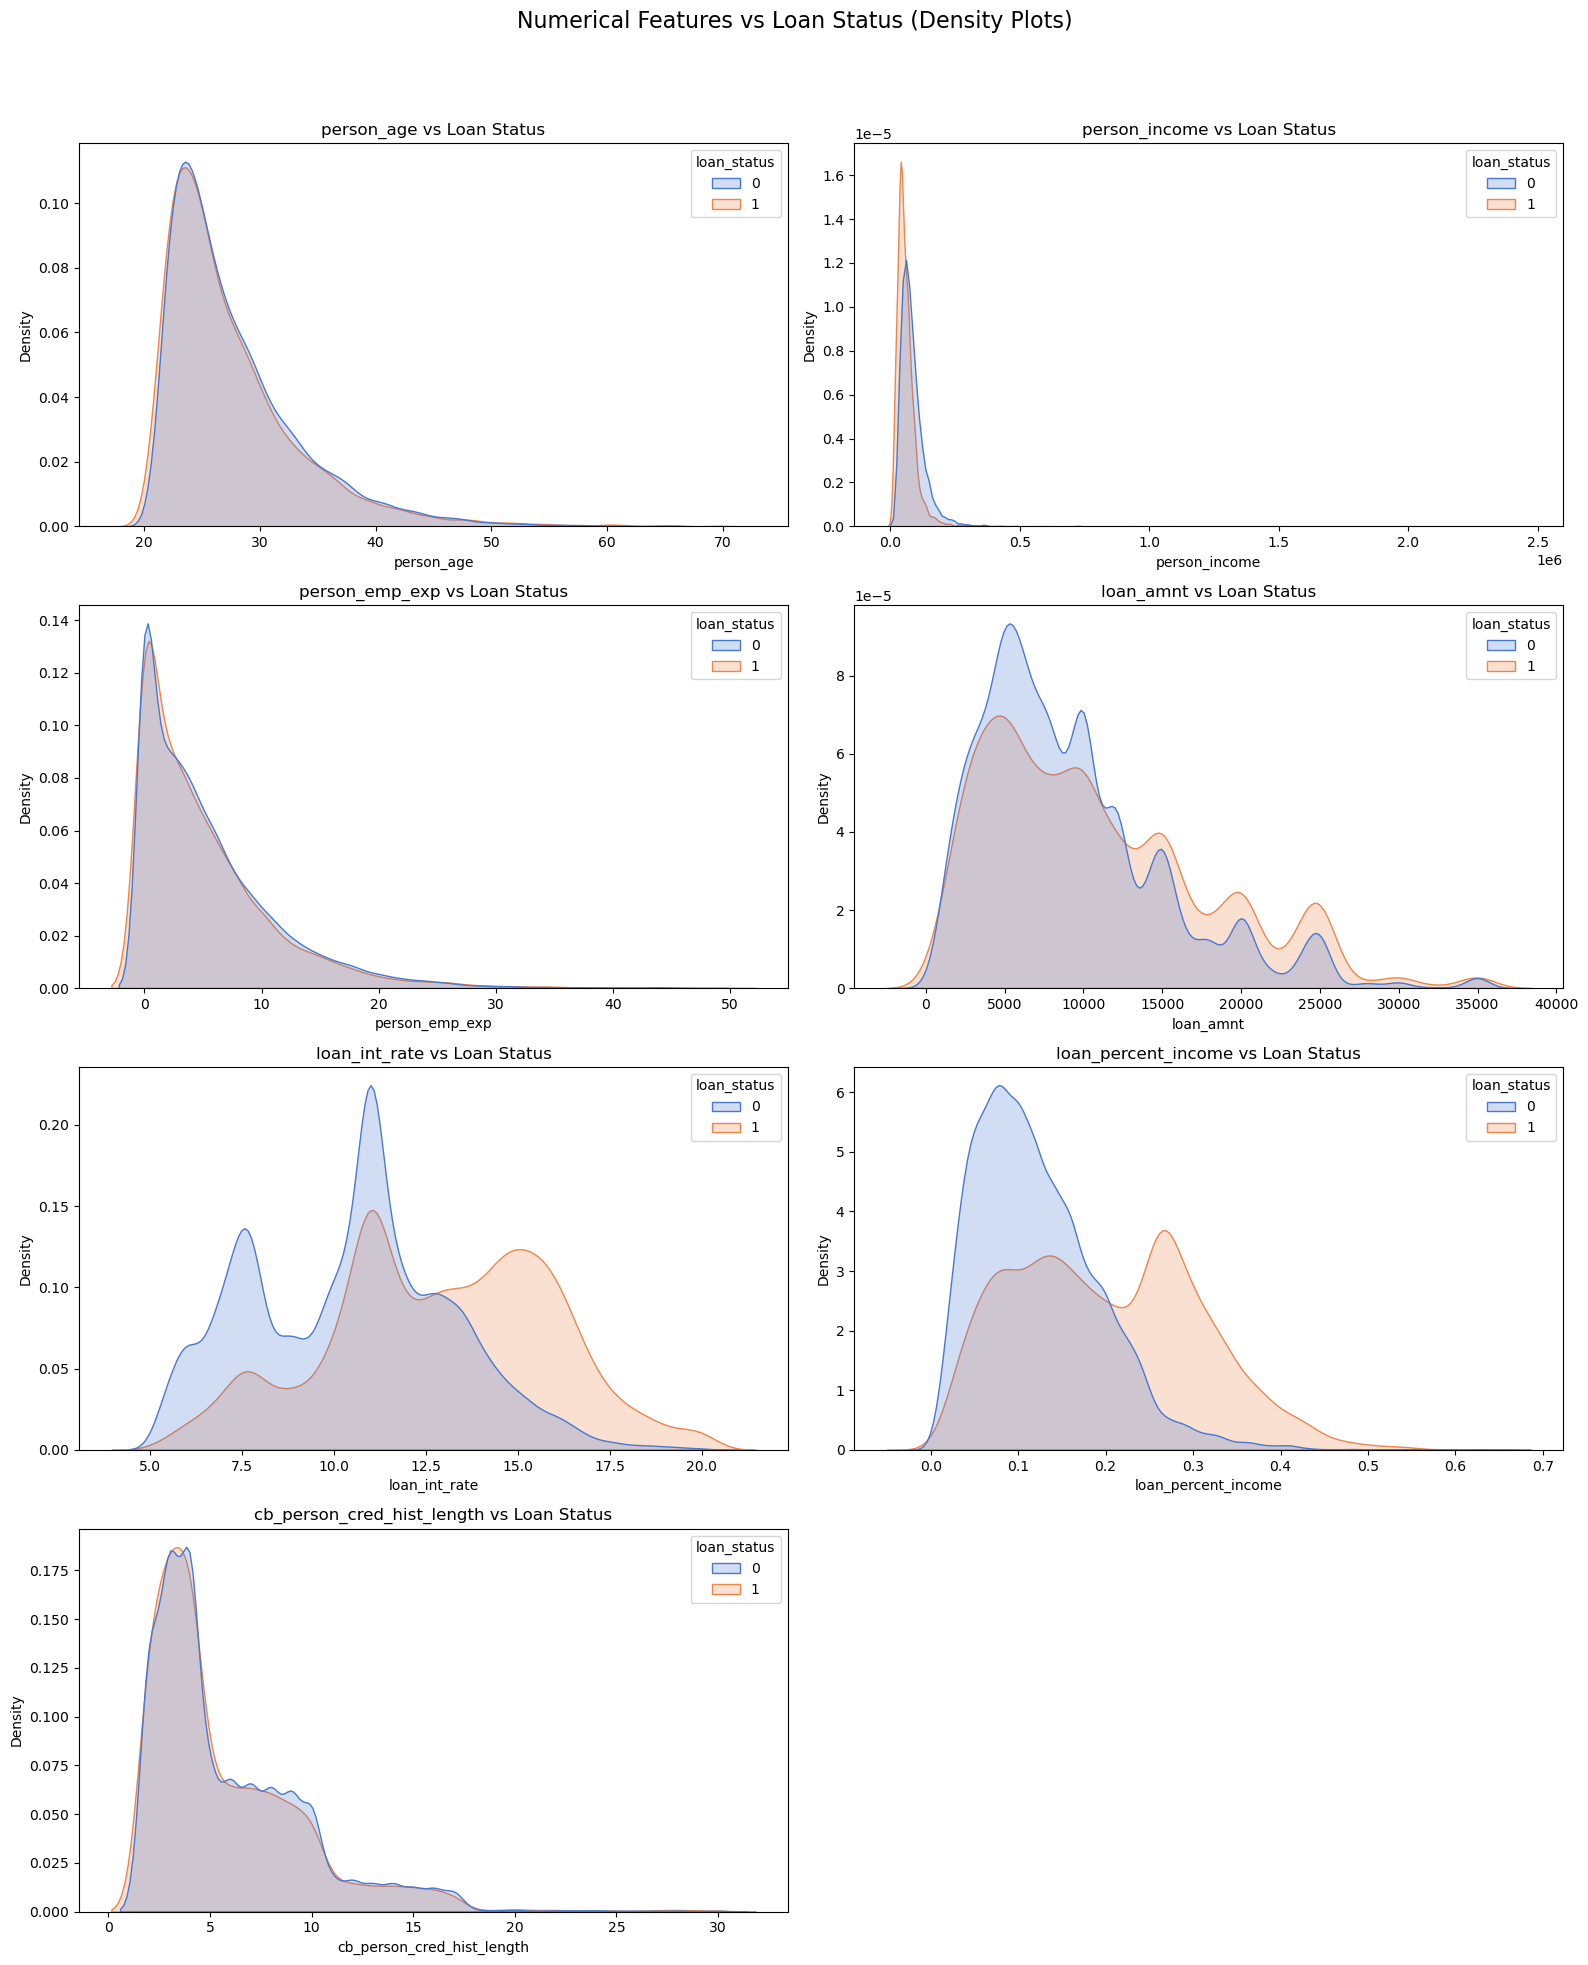

In [111]:
# Sulani Ishara Accessed: 14th April 2025
numerical_columns = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']

fig, axes = plt.subplots(4, 2, figsize=(16, 20))
fig.suptitle('Numerical Features vs Loan Status (Density Plots)', fontsize=16)

for i, col in enumerate(numerical_columns):
    sns.kdeplot(data=loans_df, x=col, hue='loan_status', ax=axes[i//2, i%2], fill=True, common_norm=False, palette='muted')
    axes[i//2, i%2].set_title(f'{col} vs Loan Status')
    axes[i//2, i%2].set_xlabel(col)
    axes[i//2, i%2].set_ylabel('Density')

fig.delaxes(axes[3, 1])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

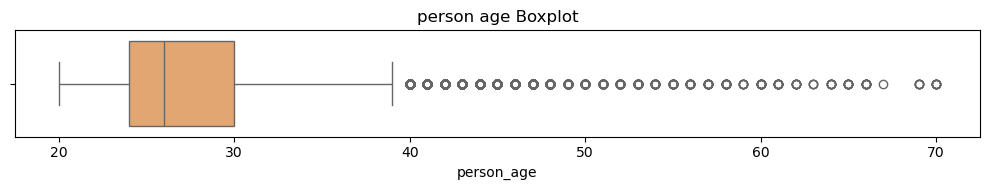


Summary Statistics for person age:
 count    44985.000000
mean        27.739335
std          5.870099
min         20.000000
25%         24.000000
50%         26.000000
75%         30.000000
max         70.000000
Name: person_age, dtype: float64


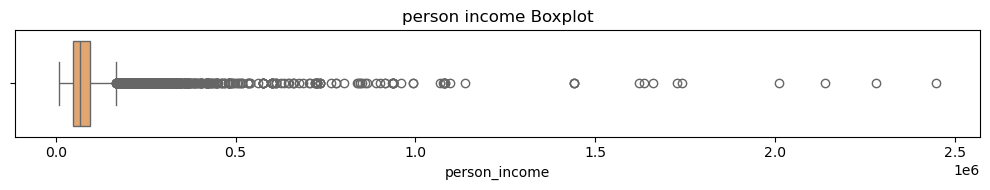


Summary Statistics for person income:
 count    4.498500e+04
mean     7.991017e+04
std      6.332666e+04
min      8.000000e+03
25%      4.719200e+04
50%      6.704600e+04
75%      9.578200e+04
max      2.448661e+06
Name: person_income, dtype: float64


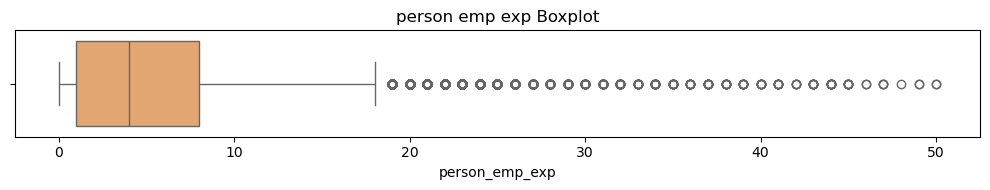


Summary Statistics for person emp exp:
 count    44985.000000
mean         5.385351
std          5.886303
min          0.000000
25%          1.000000
50%          4.000000
75%          8.000000
max         50.000000
Name: person_emp_exp, dtype: float64


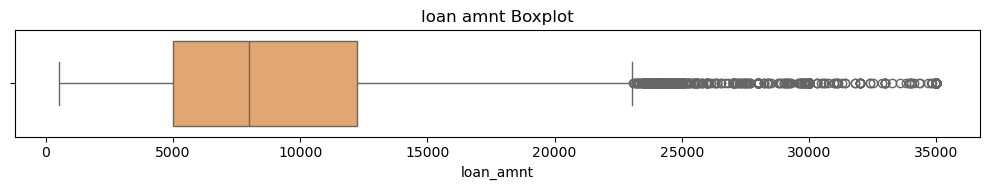


Summary Statistics for loan amnt:
 count    44985.000000
mean      9583.638368
std       6315.056351
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12238.000000
max      35000.000000
Name: loan_amnt, dtype: float64


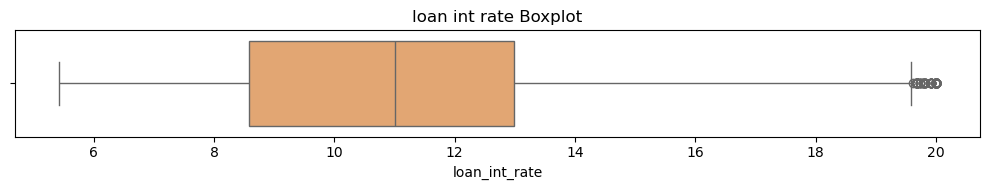


Summary Statistics for loan int rate:
 count    44985.000000
mean        11.006678
std          2.979087
min          5.420000
25%          8.590000
50%         11.010000
75%         12.990000
max         20.000000
Name: loan_int_rate, dtype: float64


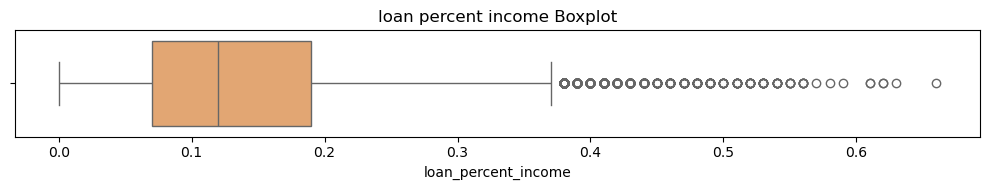


Summary Statistics for loan percent income:
 count    44985.000000
mean         0.139743
std          0.087210
min          0.000000
25%          0.070000
50%          0.120000
75%          0.190000
max          0.660000
Name: loan_percent_income, dtype: float64


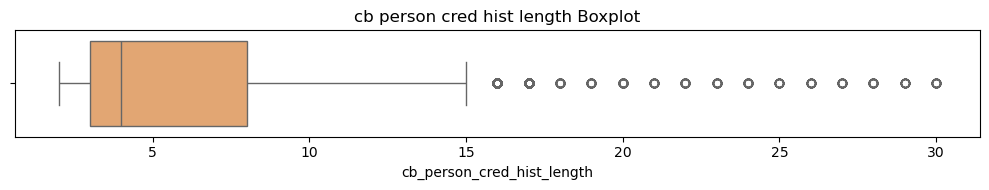


Summary Statistics for cb person cred hist length:
 count    44985.000000
mean         5.863177
std          3.869127
min          2.000000
25%          3.000000
50%          4.000000
75%          8.000000
max         30.000000
Name: cb_person_cred_hist_length, dtype: float64


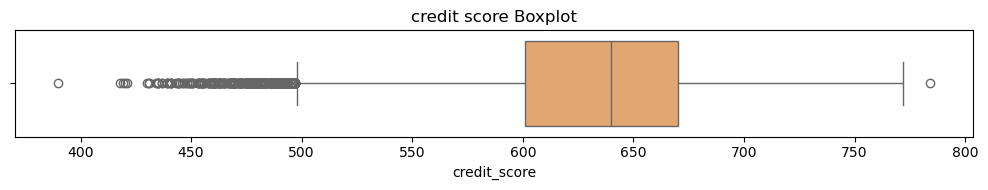


Summary Statistics for credit score:
 count    44985.000000
mean       632.569123
std         50.388810
min        390.000000
25%        601.000000
50%        640.000000
75%        670.000000
max        784.000000
Name: credit_score, dtype: float64


In [112]:
# Box and Whisker plot to see what the outliers in the dataset look like
# Sulani Ishara Accessed: 14th April 2025

# Function to perform univariate analysis for numeric columns
def univariate_analysis(data, column, title):
    plt.figure(figsize=(10, 2))
    
    sns.boxplot(x=data[column], color='sandybrown')
    plt.title(f'{title} Boxplot')
    
    plt.tight_layout()
    plt.show()

    print(f'\nSummary Statistics for {title}:\n', data[column].describe())

columns_to_analyse = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']

for column in columns_to_analyse:
    univariate_analysis(loans_df, column, column.replace('_', ' '))

/var/folders/h5/p6vdg3ps6wn1kgd_w454mf500000gn/T/ipykernel_32643/4078407632.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans_df[col] = winsorize(loans_df[col], limits=[0.025, 0.025])
/var/folders/h5/p6vdg3ps6wn1kgd_w454mf500000gn/T/ipykernel_32643/4078407632.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans_df[["person_age", "person_income", "person_emp_exp", "loan_amnt"]] = scaler.fit_transform(loans_df[["person_age", "person_income", "person_emp_exp", "loan_amnt"]])


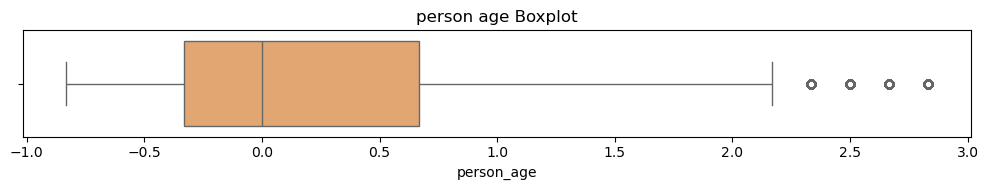


Summary Statistics for person age:
 count    44985.000000
mean         0.265374
std          0.886138
min         -0.833333
25%         -0.333333
50%          0.000000
75%          0.666667
max          2.833333
Name: person_age, dtype: float64


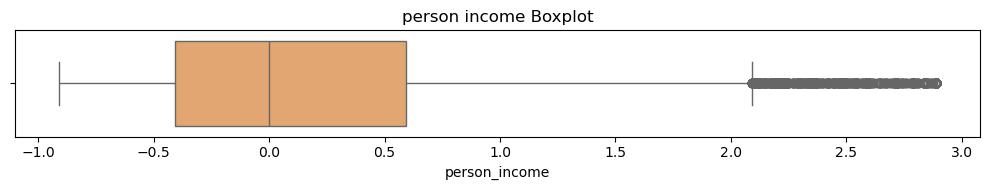


Summary Statistics for person income:
 count    44985.000000
mean         0.207182
std          0.854803
min         -0.910846
25%         -0.408603
50%          0.000000
75%          0.591397
max          2.888352
Name: person_income, dtype: float64


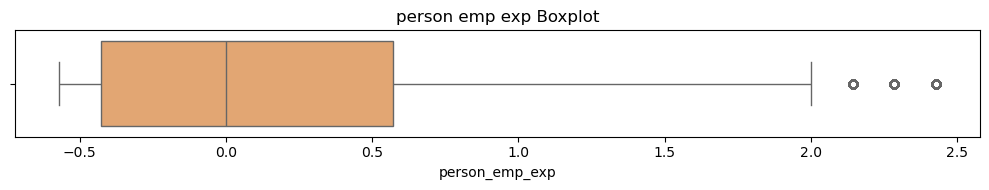


Summary Statistics for person emp exp:
 count    44985.000000
mean         0.177688
std          0.763888
min         -0.571429
25%         -0.428571
50%          0.000000
75%          0.571429
max          2.428571
Name: person_emp_exp, dtype: float64


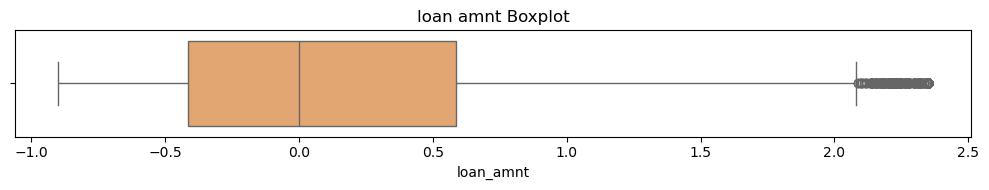


Summary Statistics for loan amnt:
 count    44985.000000
mean         0.207831
std          0.833624
min         -0.898038
25%         -0.414479
50%          0.000000
75%          0.585521
max          2.348715
Name: loan_amnt, dtype: float64


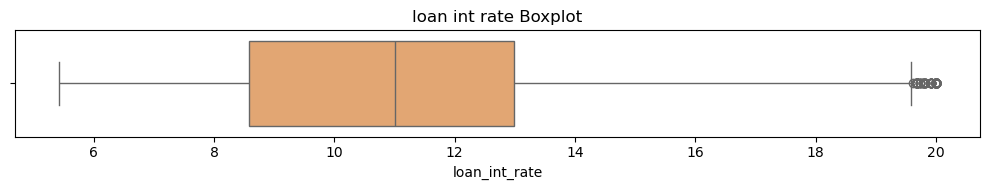


Summary Statistics for loan int rate:
 count    44985.000000
mean        11.006678
std          2.979087
min          5.420000
25%          8.590000
50%         11.010000
75%         12.990000
max         20.000000
Name: loan_int_rate, dtype: float64


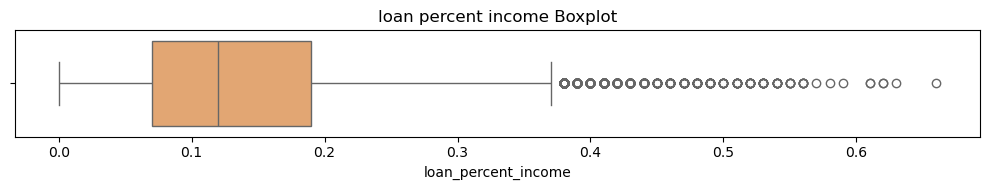


Summary Statistics for loan percent income:
 count    44985.000000
mean         0.139743
std          0.087210
min          0.000000
25%          0.070000
50%          0.120000
75%          0.190000
max          0.660000
Name: loan_percent_income, dtype: float64


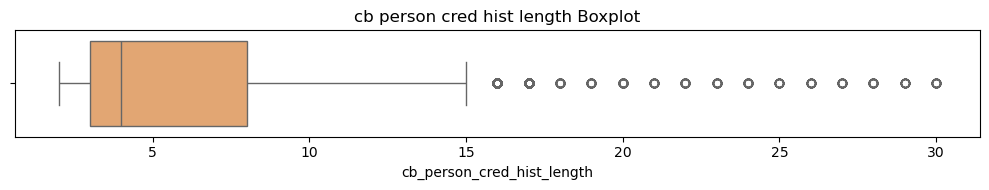


Summary Statistics for cb person cred hist length:
 count    44985.000000
mean         5.863177
std          3.869127
min          2.000000
25%          3.000000
50%          4.000000
75%          8.000000
max         30.000000
Name: cb_person_cred_hist_length, dtype: float64


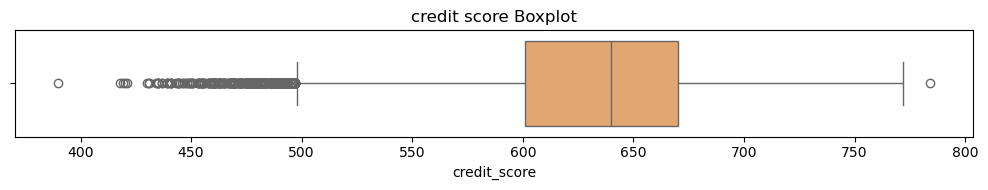


Summary Statistics for credit score:
 count    44985.000000
mean       632.569123
std         50.388810
min        390.000000
25%        601.000000
50%        640.000000
75%        670.000000
max        784.000000
Name: credit_score, dtype: float64


In [113]:
from sklearn.preprocessing import RobustScaler
from scipy.stats.mstats import winsorize

for col in ["person_age", "person_income", "person_emp_exp", "loan_amnt"]:
    loans_df[col] = winsorize(loans_df[col], limits=[0.025, 0.025])
# Robust scaling
scaler = RobustScaler()
loans_df[["person_age", "person_income", "person_emp_exp", "loan_amnt"]] = scaler.fit_transform(loans_df[["person_age", "person_income", "person_emp_exp", "loan_amnt"]])

# Box and Whisker plot to see what the outliers in the dataset look like
# Function to perform univariate analysis for numeric columns

for column in columns_to_analyse:
    univariate_analysis(loans_df, column, column.replace('_', ' '))

In [114]:
columns_to_check = ["person_age", "person_income", "person_emp_exp", "loan_amnt"]

for col in columns_to_check:
    skew_val = loans_df[col].skew()
    print(f"{col} skewness: {skew_val:.2f}")

person_age skewness: 1.18
person_income skewness: 1.27
person_emp_exp skewness: 1.23
loan_amnt skewness: 0.94


person_age skewness after log1p: -0.22
person_income skewness after log1p: -0.72
person_emp_exp skewness after log1p: 0.22
loan_amnt skewness after log1p: -0.67


/var/folders/h5/p6vdg3ps6wn1kgd_w454mf500000gn/T/ipykernel_32643/4222552184.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans_df[col] = np.log1p(loans_df[col])


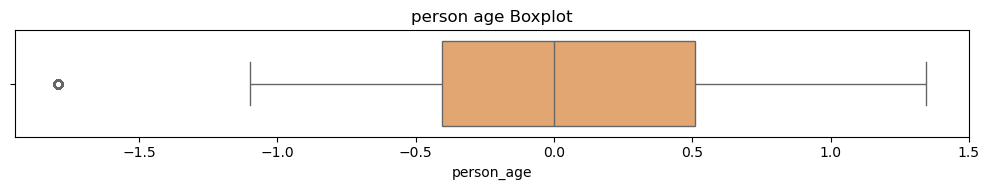


Summary Statistics for person age:
 count    44985.000000
mean        -0.010294
std          0.726477
min         -1.791759
25%         -0.405465
50%          0.000000
75%          0.510826
max          1.343735
Name: person_age, dtype: float64


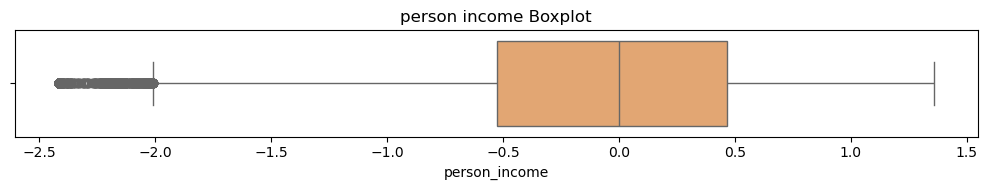


Summary Statistics for person income:
 count    44985.000000
mean        -0.084973
std          0.806123
min         -2.417388
25%         -0.525267
50%          0.000000
75%          0.464613
max          1.357985
Name: person_income, dtype: float64


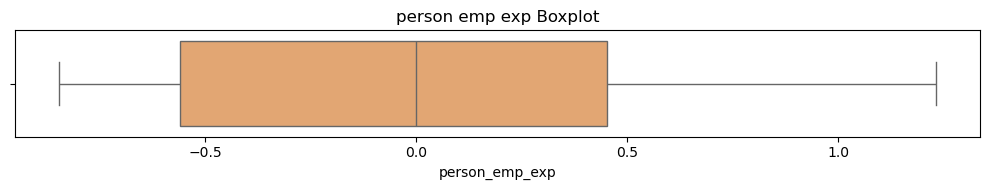


Summary Statistics for person emp exp:
 count    44985.000000
mean        -0.028691
std          0.616124
min         -0.847298
25%         -0.559616
50%          0.000000
75%          0.451985
max          1.232144
Name: person_emp_exp, dtype: float64


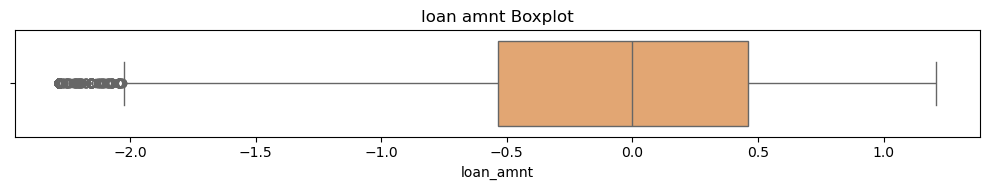


Summary Statistics for loan amnt:
 count    44985.000000
mean        -0.089653
std          0.816802
min         -2.283156
25%         -0.535253
50%          0.000000
75%          0.460913
max          1.208577
Name: loan_amnt, dtype: float64


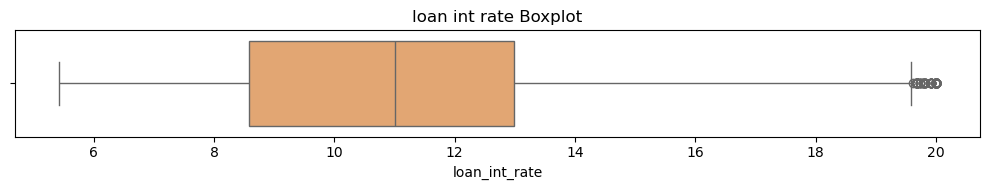


Summary Statistics for loan int rate:
 count    44985.000000
mean        11.006678
std          2.979087
min          5.420000
25%          8.590000
50%         11.010000
75%         12.990000
max         20.000000
Name: loan_int_rate, dtype: float64


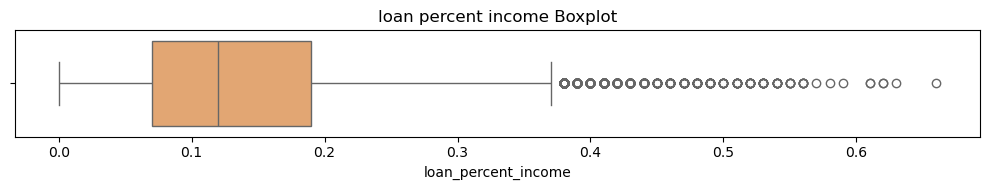


Summary Statistics for loan percent income:
 count    44985.000000
mean         0.139743
std          0.087210
min          0.000000
25%          0.070000
50%          0.120000
75%          0.190000
max          0.660000
Name: loan_percent_income, dtype: float64


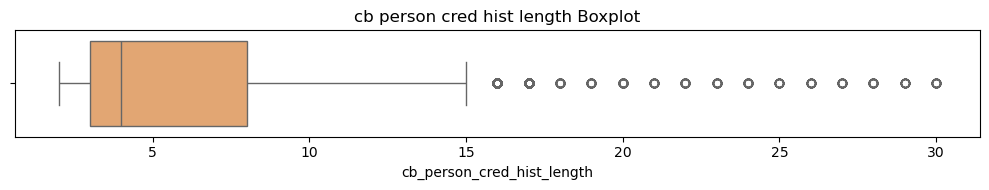


Summary Statistics for cb person cred hist length:
 count    44985.000000
mean         5.863177
std          3.869127
min          2.000000
25%          3.000000
50%          4.000000
75%          8.000000
max         30.000000
Name: cb_person_cred_hist_length, dtype: float64


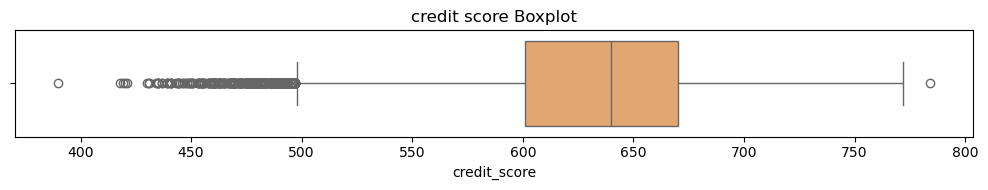


Summary Statistics for credit score:
 count    44985.000000
mean       632.569123
std         50.388810
min        390.000000
25%        601.000000
50%        640.000000
75%        670.000000
max        784.000000
Name: credit_score, dtype: float64


In [115]:
# Apply log1p directly — it's safe for 0s
for col in columns_to_check:
    loans_df[col] = np.log1p(loans_df[col])

# Recheck skewness
for col in columns_to_check:
    skew_val = loans_df[col].skew()
    print(f"{col} skewness after log1p: {skew_val:.2f}")

for column in columns_to_analyse:
    univariate_analysis(loans_df, column, column.replace('_', ' '))

In [116]:
loans_df
loans_df.describe().T

count        mean        std         min  \
person_age                  44985.0   -0.010294   0.726477   -1.791759   
person_income               44985.0   -0.084973   0.806123   -2.417388   
person_emp_exp              44985.0   -0.028691   0.616124   -0.847298   
loan_amnt                   44985.0   -0.089653   0.816802   -2.283156   
loan_int_rate               44985.0   11.006678   2.979087    5.420000   
loan_percent_income         44985.0    0.139743   0.087210    0.000000   
cb_person_cred_hist_length  44985.0    5.863177   3.869127    2.000000   
credit_score                44985.0  632.569123  50.388810  390.000000   
loan_status                 44985.0    0.222296   0.415794    0.000000   

                                   25%     50%         75%         max  
person_age                   -0.405465    0.00    0.510826    1.343735  
person_income                -0.525267    0.00    0.464613    1.357985  
person_emp_exp               -0.559616    0.00    0.451985    1.232144  
loan_amnt                    -0.535253    0.00    0.460913    1.208577  
loan_int_rate                 8.590000   11.01   12.990000   20.000000  
loan_percent_income           0.070000    0.12    0.190000    0.660000  
cb_person_cred_hist_length    3.000000    4.00    8.000000   30.000000  
credit_score                601.000000  640.00  670.000000  784.000000  
loan_status                   0.000000    0.00    0.000000    1.000000

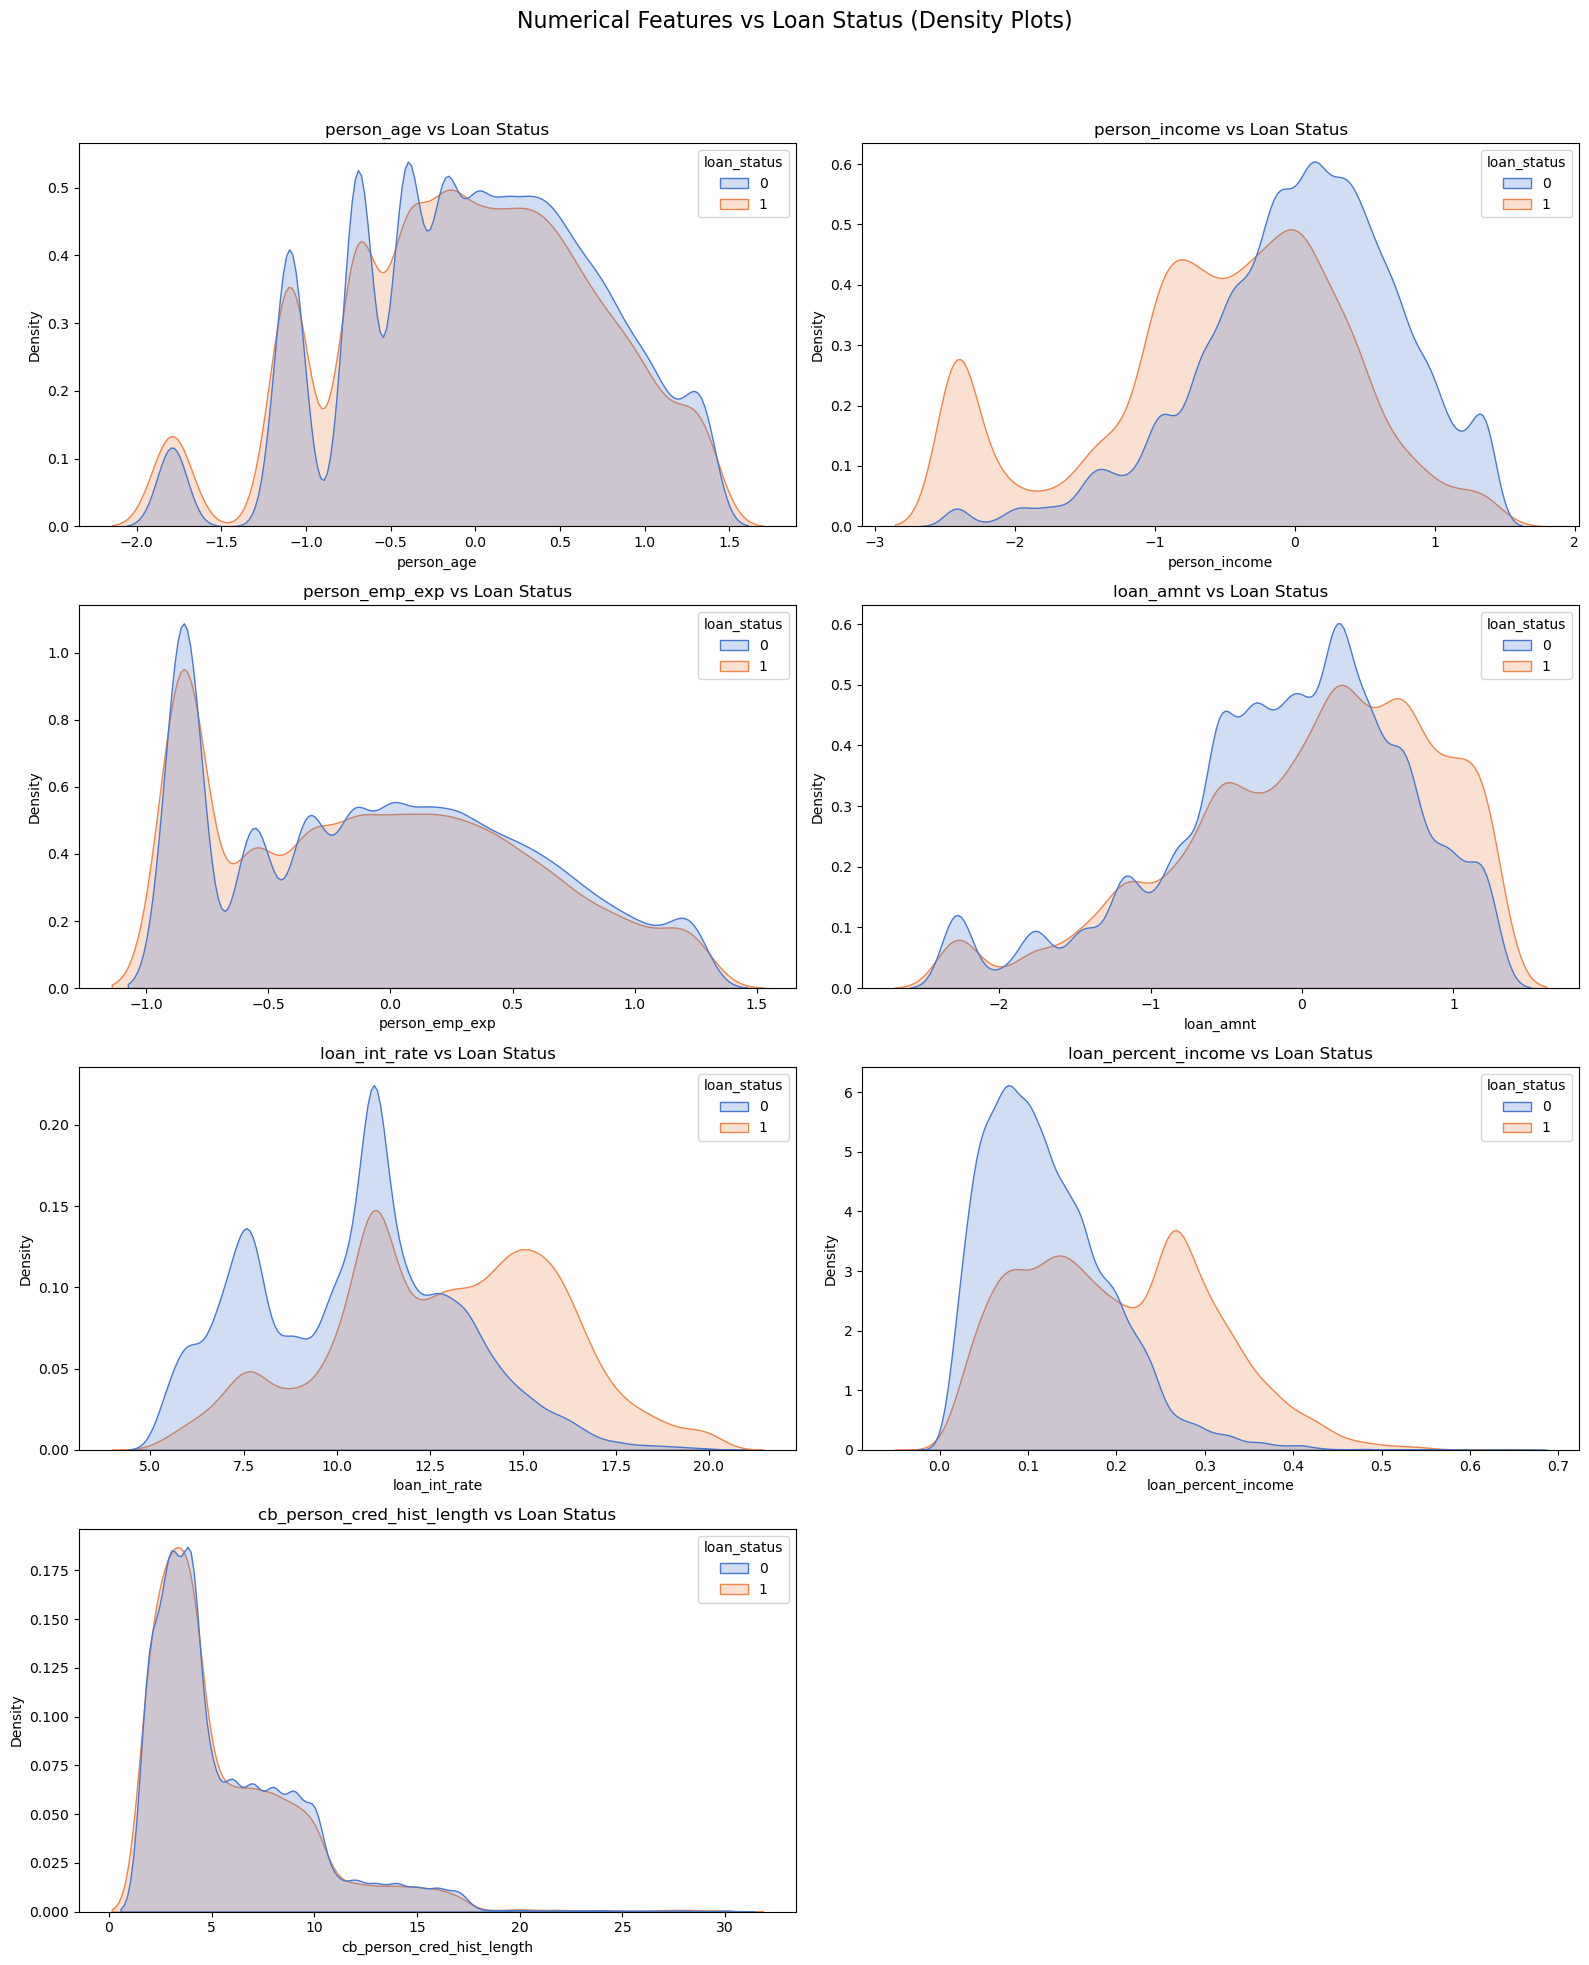

In [117]:
# Sulani Ishara Accessed: 14th April 2025
numerical_columns = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']

fig, axes = plt.subplots(4, 2, figsize=(16, 20))
fig.suptitle('Numerical Features vs Loan Status (Density Plots)', fontsize=16)

for i, col in enumerate(numerical_columns):
    sns.kdeplot(data=loans_df, x=col, hue='loan_status', ax=axes[i//2, i%2], fill=True, common_norm=False, palette='muted')
    axes[i//2, i%2].set_title(f'{col} vs Loan Status')
    axes[i//2, i%2].set_xlabel(col)
    axes[i//2, i%2].set_ylabel('Density')

fig.delaxes(axes[3, 1])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [118]:
# Making Education into a non-categorical columns
loans_df['person_education'] = loans_df['person_education'].replace({
    'High School': 0,
    'Associate': 1,
    'Bachelor': 2,
    'Master': 3,
    'Doctorate': 4
})

/var/folders/h5/p6vdg3ps6wn1kgd_w454mf500000gn/T/ipykernel_32643/1636345205.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loans_df['person_education'] = loans_df['person_education'].replace({
/var/folders/h5/p6vdg3ps6wn1kgd_w454mf500000gn/T/ipykernel_32643/1636345205.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans_df['person_education'] = loans_df['person_education'].replace({


In [119]:
loans_df

person_age person_gender  person_education  person_income  \
0       -1.098612        female                 3       0.096114   
1       -1.791759        female                 0      -2.417388   
2       -0.182322        female                 0      -2.417388   
3       -0.693147        female                 2       0.232313   
4       -0.405465          male                 3      -0.018927   
...           ...           ...               ...            ...   
44995    0.154151          male                 1      -0.498519   
44996    1.041454        female                 1      -0.025978   
44997    0.773190          male                 1      -0.233123   
44998    0.405465          male                 2      -1.195026   
44999   -0.405465          male                 0      -0.382285   

       person_emp_exp person_home_ownership  loan_amnt        loan_intent  \
0           -0.847298                  RENT   1.208577           PERSONAL   
1           -0.847298                   OWN  -2.283156          EDUCATION   
2           -0.154151              MORTGAGE  -0.423730            MEDICAL   
3           -0.847298                  RENT   1.208577            MEDICAL   
4           -0.559616                  RENT   1.208577            MEDICAL   
...               ...                   ...        ...                ...   
44995        0.251314                  RENT   0.676570            MEDICAL   
44996        1.049822                  RENT   0.129413    HOMEIMPROVEMENT   
44997        0.356675                  RENT  -1.281708  DEBTCONSOLIDATION   
44998        0.000000                  RENT   0.439956          EDUCATION   
44999       -0.559616                  RENT  -0.203884  DEBTCONSOLIDATION   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
0              16.02                 0.49                         3.0   
1              11.14                 0.08                         2.0   
2              12.87                 0.44                         3.0   
3              15.23                 0.44                         2.0   
4              14.27                 0.53                         4.0   
...              ...                  ...                         ...   
44995          15.66                 0.31                         3.0   
44996          14.07                 0.14                        11.0   
44997          10.02                 0.05                        10.0   
44998          13.23                 0.36                         6.0   
44999          17.05                 0.13                         3.0   

       credit_score previous_loan_defaults_on_file  loan_status  
0               561                             No            1  
1               504                            Yes            0  
2               635                             No            1  
3               675                             No            1  
4               586                             No            1  
...             ...                            ...          ...  
44995           645                             No            1  
44996           621                             No            1  
44997           668                             No            1  
44998           604                             No            1  
44999           628                             No            1  

[44985 rows x 14 columns]

In [120]:
# One-hot coding for dummy variables
loans_df = pd.get_dummies(loans_df, columns = ['person_gender', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file'], drop_first = True)

# Checking the data types
loans_df.dtypes

person_age                            float64
person_education                        int64
person_income                         float64
person_emp_exp                        float64
loan_amnt                             float64
loan_int_rate                         float64
loan_percent_income                   float64
cb_person_cred_hist_length            float64
credit_score                            int64
loan_status                             int64
person_gender_male                       bool
person_home_ownership_OTHER              bool
person_home_ownership_OWN                bool
person_home_ownership_RENT               bool
loan_intent_EDUCATION                    bool
loan_intent_HOMEIMPROVEMENT              bool
loan_intent_MEDICAL                      bool
loan_intent_PERSONAL                     bool
loan_intent_VENTURE                      bool
previous_loan_defaults_on_file_Yes       bool
dtype: object

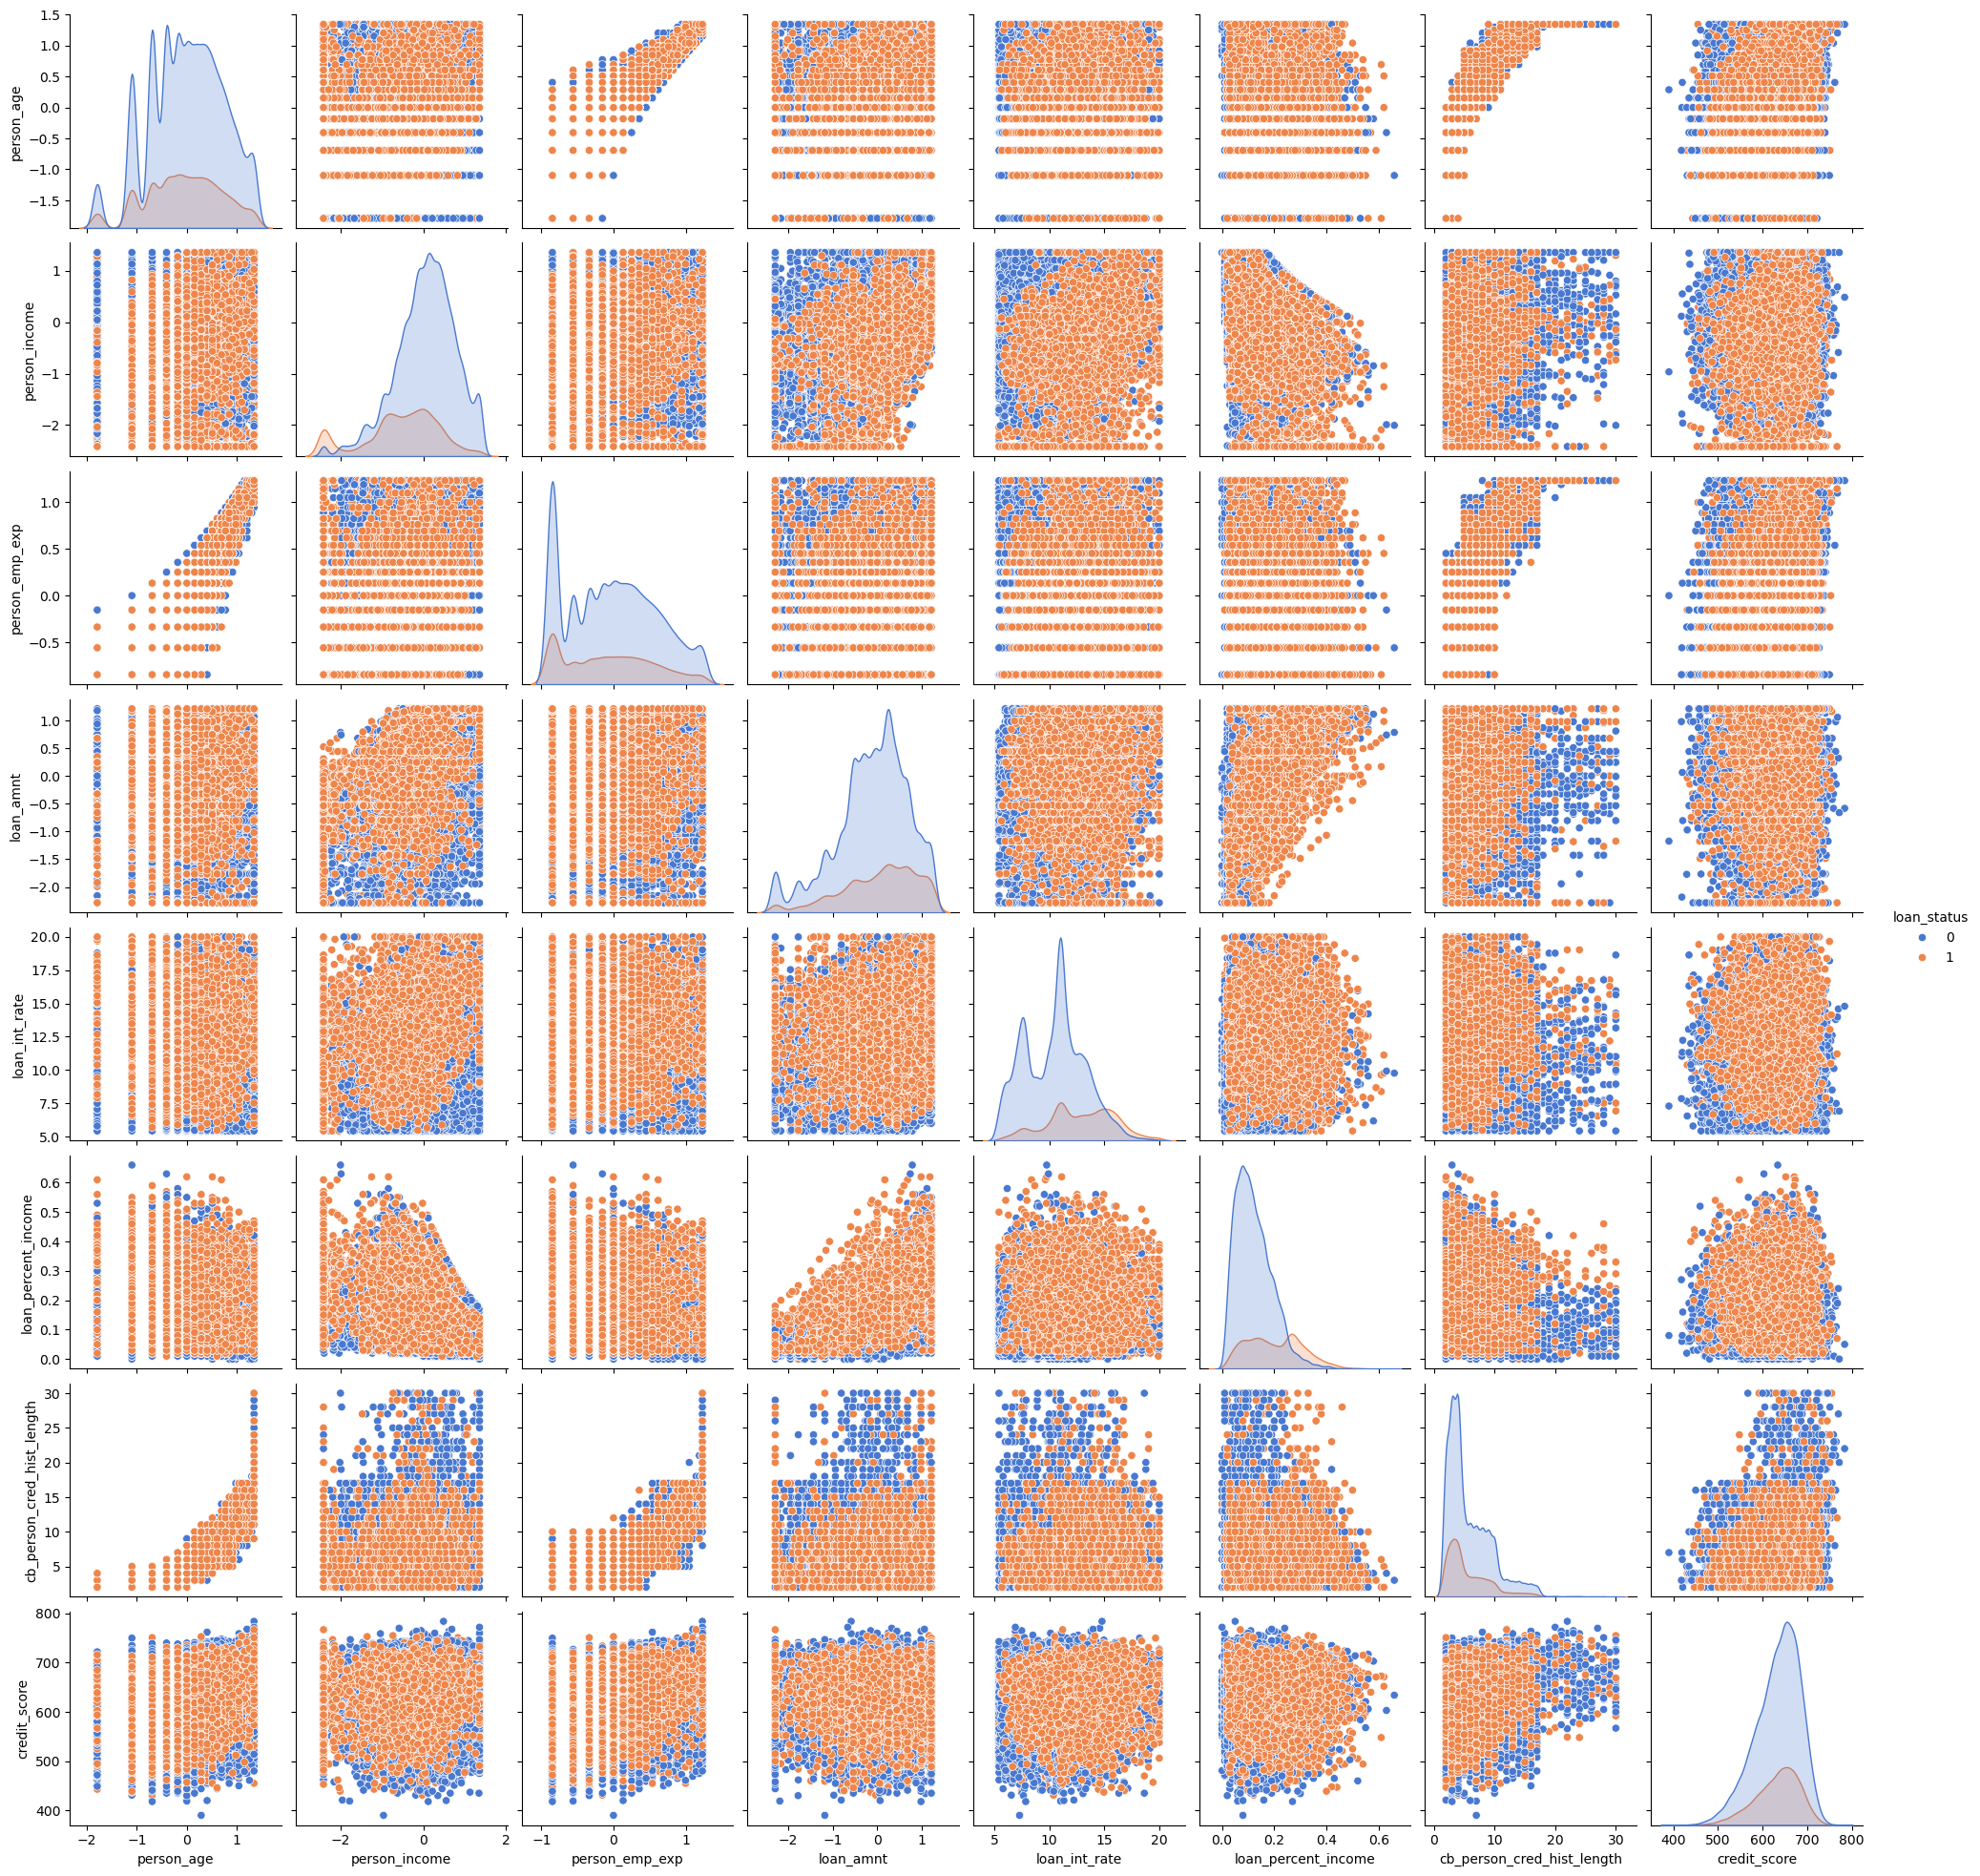

In [121]:
# Define numerical columns with target
numerical_columns_with_target = [
    'person_age', 
    'person_income', 
    'person_emp_exp', 
    'loan_amnt', 
    'loan_int_rate', 
    'loan_percent_income', 
    'cb_person_cred_hist_length', 
    'credit_score'
]

# Create pairplot of numerical features with loan_status as hue
sns.pairplot(loans_df[numerical_columns_with_target + ['loan_status']], 
             hue='loan_status', 
             palette='muted'
            )
plt.show()


In [122]:
# Getting a correlation matrix
num_loans_df = loans_df.select_dtypes(include=['number']) # Include only numerical data types

# Correlation of that data
corr_matrix = num_loans_df.corr()
print(corr_matrix)

                            person_age  person_education  person_income  \
person_age                    1.000000          0.035695       0.155206   
person_education              0.035695          1.000000       0.010170   
person_income                 0.155206          0.010170       1.000000   
person_emp_exp                0.872665          0.025813       0.115596   
loan_amnt                     0.067378          0.001772       0.412755   
loan_int_rate                 0.014931          0.003674      -0.027007   
loan_percent_income          -0.054326         -0.004378      -0.348179   
cb_person_cred_hist_length    0.769746         -0.004589       0.082971   
credit_score                  0.157042          0.211911       0.024444   
loan_status                  -0.033822         -0.001160      -0.305005   

                            person_emp_exp  loan_amnt  loan_int_rate  \
person_age                        0.872665   0.067378       0.014931   
person_education              

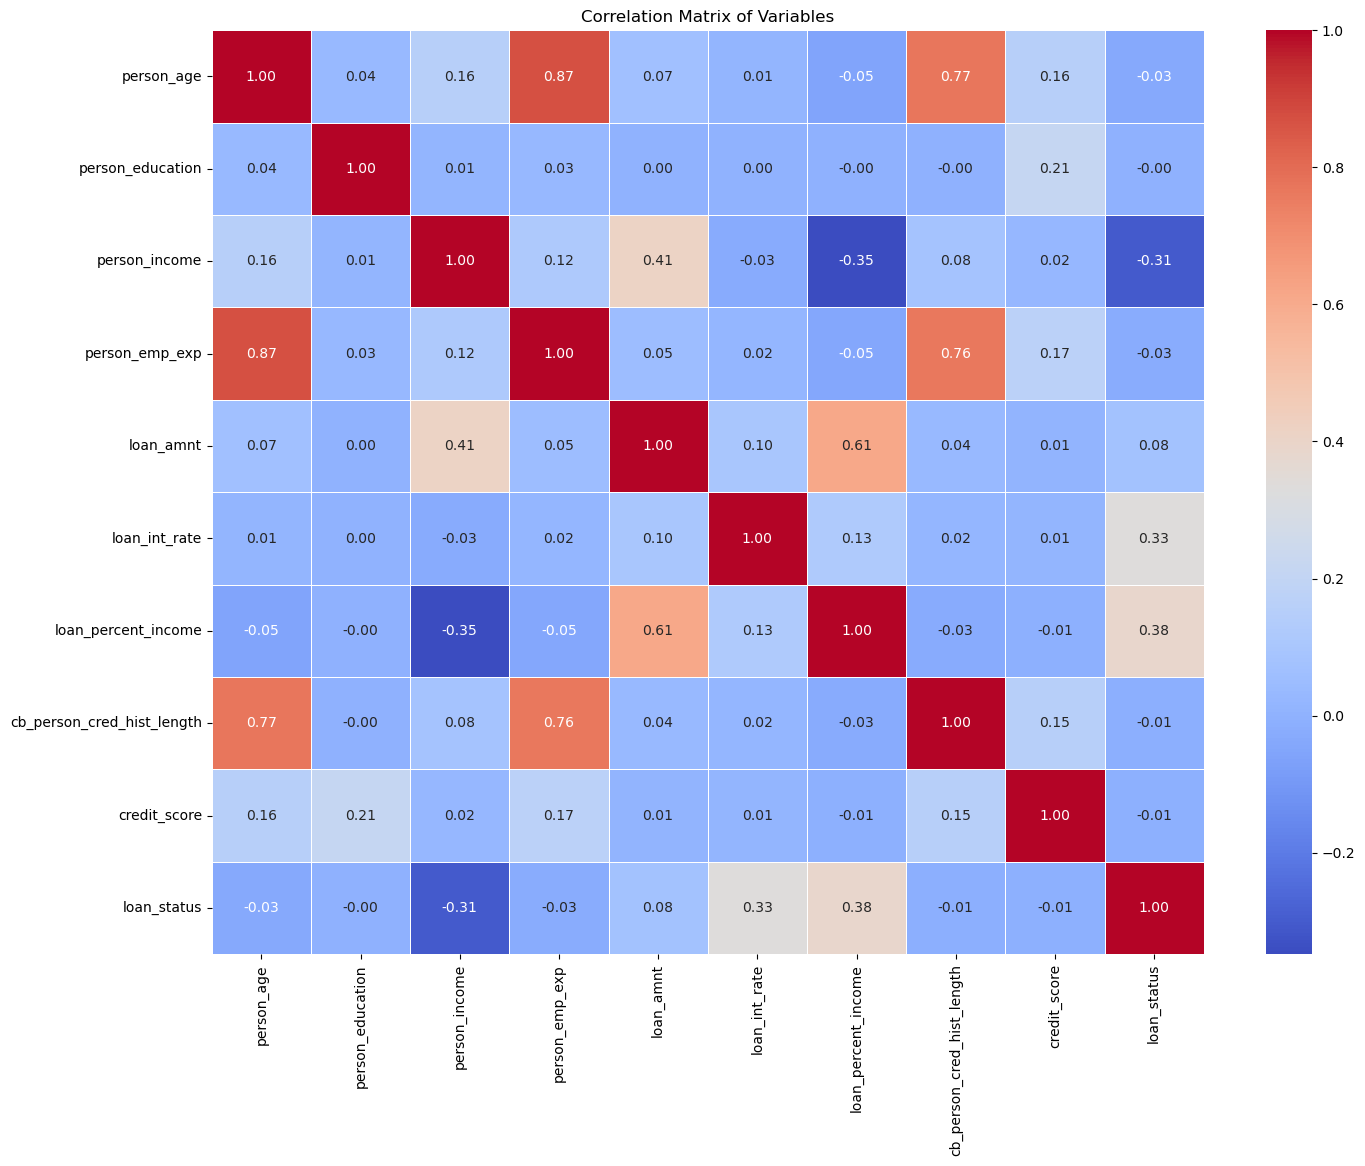

In [123]:
# Visual the Correlation Matrix
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Variables')
plt.show()

In [124]:
# Drop Person Employment Experience and Age
loans_df = loans_df.drop(columns=['person_emp_exp','person_age'])
loans_df

person_education  person_income  loan_amnt  loan_int_rate  \
0                     3       0.096114   1.208577          16.02   
1                     0      -2.417388  -2.283156          11.14   
2                     0      -2.417388  -0.423730          12.87   
3                     2       0.232313   1.208577          15.23   
4                     3      -0.018927   1.208577          14.27   
...                 ...            ...        ...            ...   
44995                 1      -0.498519   0.676570          15.66   
44996                 1      -0.025978   0.129413          14.07   
44997                 1      -0.233123  -1.281708          10.02   
44998                 2      -1.195026   0.439956          13.23   
44999                 0      -0.382285  -0.203884          17.05   

       loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                     0.49                         3.0           561   
1                     0.08                         2.0           504   
2                     0.44                         3.0           635   
3                     0.44                         2.0           675   
4                     0.53                         4.0           586   
...                    ...                         ...           ...   
44995                 0.31                         3.0           645   
44996                 0.14                        11.0           621   
44997                 0.05                        10.0           668   
44998                 0.36                         6.0           604   
44999                 0.13                         3.0           628   

       loan_status  person_gender_male  person_home_ownership_OTHER  \
0                1               False                        False   
1                0               False                        False   
2                1               False                        False   
3                1               False                        False   
4                1                True                        False   
...            ...                 ...                          ...   
44995            1                True                        False   
44996            1               False                        False   
44997            1                True                        False   
44998            1                True                        False   
44999            1                True                        False   

       person_home_ownership_OWN  person_home_ownership_RENT  \
0                          False                        True   
1                           True                       False   
2                          False                       False   
3                          False                        True   
4                          False                        True   
...                          ...                         ...   
44995                      False                        True   
44996                      False                        True   
44997                      False                        True   
44998                      False                        True   
44999                      False                        True   

       loan_intent_EDUCATION  loan_intent_HOMEIMPROVEMENT  \
0                      False                        False   
1                       True                        False   
2                      False                        False   
3                      False                        False   
4                      False                        False   
...                      ...                          ...   
44995                  False                        False   
44996                  False                         True   
44997                  False                        False   
44998                   True                        False   
44999                  False    

<function matplotlib.pyplot.show(close=None, block=None)>

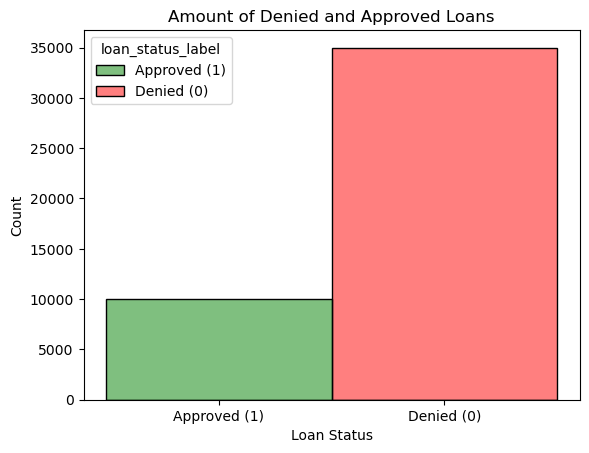

In [125]:
# Create a new column for custom labels
loans_df['loan_status_label'] = loans_df['loan_status'].map({0: 'Denied (0)', 1: 'Approved (1)'})

# Create a histogram plotting Approved and Denied loans
sns.histplot(
    data=loans_df,
    x='loan_status_label',
    hue='loan_status_label',
    palette={"Denied (0)": "red", "Approved (1)": "green"}
)
plt.title("Amount of Denied and Approved Loans")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show

In [126]:
# Splitting the Dataset into X and Y
X = loans_df.drop(columns=['loan_status', 'loan_status_label'])  
y = loans_df['loan_status'] 

In [127]:
X

person_education  person_income  loan_amnt  loan_int_rate  \
0                     3       0.096114   1.208577          16.02   
1                     0      -2.417388  -2.283156          11.14   
2                     0      -2.417388  -0.423730          12.87   
3                     2       0.232313   1.208577          15.23   
4                     3      -0.018927   1.208577          14.27   
...                 ...            ...        ...            ...   
44995                 1      -0.498519   0.676570          15.66   
44996                 1      -0.025978   0.129413          14.07   
44997                 1      -0.233123  -1.281708          10.02   
44998                 2      -1.195026   0.439956          13.23   
44999                 0      -0.382285  -0.203884          17.05   

       loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                     0.49                         3.0           561   
1                     0.08                         2.0           504   
2                     0.44                         3.0           635   
3                     0.44                         2.0           675   
4                     0.53                         4.0           586   
...                    ...                         ...           ...   
44995                 0.31                         3.0           645   
44996                 0.14                        11.0           621   
44997                 0.05                        10.0           668   
44998                 0.36                         6.0           604   
44999                 0.13                         3.0           628   

       person_gender_male  person_home_ownership_OTHER  \
0                   False                        False   
1                   False                        False   
2                   False                        False   
3                   False                        False   
4                    True                        False   
...                   ...                          ...   
44995                True                        False   
44996               False                        False   
44997                True                        False   
44998                True                        False   
44999                True                        False   

       person_home_ownership_OWN  person_home_ownership_RENT  \
0                          False                        True   
1                           True                       False   
2                          False                       False   
3                          False                        True   
4                          False                        True   
...                          ...                         ...   
44995                      False                        True   
44996                      False                        True   
44997                      False                        True   
44998                      False                        True   
44999                      False                        True   

       loan_intent_EDUCATION  loan_intent_HOMEIMPROVEMENT  \
0                      False                        False   
1                       True                        False   
2                      False                        False   
3                      False                        False   
4                      False                        False   
...                      ...                          ...   
44995                  False                        False   
44996                  False                         True   
44997                  False                        False   
44998                   True                        False   
44999                  False                        False   

       loan_intent_MEDICAL  loan_intent_PERSONAL  loan_intent_VENTURE  \
0                    False                  True     

In [128]:
y

0        1
1        0
2        1
3        1
4        1
        ..
44995    1
44996    1
44997    1
44998    1
44999    1
Name: loan_status, Length: 44985, dtype: int64

In [129]:
# Splitting the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [130]:
# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [131]:
# Setting Up 10-Fold Stratified Cross-Validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
lr_accuracy_scores = []

# Loop through each fold
for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_resampled, X_test = X.iloc[train_index], X.iloc[test_index]
    y_resampled, y_test = y.iloc[train_index], y.iloc[test_index]

    # --- Model Training ---
    reg_model_lr = LogisticRegression(max_iter=200000, random_state=42)
    reg_model_lr.fit(X_resampled, y_resampled)
    
    # Evaluate the model on the test data
    lr_accuracy = reg_model_lr.score(X_test, y_test)
    lr_accuracy_scores.append(lr_accuracy)
    print(f"Fold {fold} Accuracy: {lr_accuracy:.4f}")
    
print(f"Average Accuracy: {sum(lr_accuracy_scores)/len(lr_accuracy_scores):.4f}")

Fold 1 Accuracy: 0.9000
Fold 2 Accuracy: 0.9046
Fold 3 Accuracy: 0.8998
Fold 4 Accuracy: 0.8991
Fold 5 Accuracy: 0.8993
Fold 6 Accuracy: 0.8993
Fold 7 Accuracy: 0.8993
Fold 8 Accuracy: 0.8962
Fold 9 Accuracy: 0.8980
Fold 10 Accuracy: 0.8986
Average Accuracy: 0.8994


In [132]:
# Setting Up 10-Fold Stratified Cross-Validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
lr2_accuracy_scores = []

# Loop through each fold
for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_resampled, X_test = X.iloc[train_index], X.iloc[test_index]
    y_resampled, y_test = y.iloc[train_index], y.iloc[test_index]

    # --- Model Training ---
    reg_model_lr2 = LogisticRegression(max_iter=200000, random_state=42, penalty='l2')
    reg_model_lr2.fit(X_resampled, y_resampled)
    
    # Evaluate the model on the test data
    lr2_accuracy = reg_model_lr2.score(X_test, y_test)
    lr2_accuracy_scores.append(lr2_accuracy)
    print(f"Fold {fold} Accuracy: {lr2_accuracy:.4f}")
    
print(f"Average Accuracy: {sum(lr2_accuracy_scores)/len(lr2_accuracy_scores):.4f}")

Fold 1 Accuracy: 0.9000
Fold 2 Accuracy: 0.9046
Fold 3 Accuracy: 0.8998
Fold 4 Accuracy: 0.8991
Fold 5 Accuracy: 0.8993
Fold 6 Accuracy: 0.8993
Fold 7 Accuracy: 0.8993
Fold 8 Accuracy: 0.8962
Fold 9 Accuracy: 0.8980
Fold 10 Accuracy: 0.8986
Average Accuracy: 0.8994


In [133]:
# Getting the predictions for the Logistic Regression Model
predictions_lr = reg_model_lr.predict(X_test)

In [134]:
# Getting the predictions for the Logistic Regression Model
predictions_lr2 = reg_model_lr2.predict(X_test)

In [135]:
# Compute the evaluation metrics
lr_precision = precision_score(y_test, predictions_lr)
lr_recall = recall_score (y_test, predictions_lr)
lr_f1 = f1_score(y_test, predictions_lr)

# Print out evaluation metrics
print(f"Average Accuracy: {sum(lr_accuracy_scores)/len(lr_accuracy_scores):.4f}")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall: {lr_recall:.4f}")
print(f"F1-Score: {lr_f1:.4f}")

Average Accuracy: 0.8994
Precision: 0.7804
Recall: 0.7570
F1-Score: 0.7685


In [136]:
# Compute the evaluation metrics
lr2_precision = precision_score(y_test, predictions_lr2)
lr2_recall = recall_score (y_test, predictions_lr2)
lr2_f1 = f1_score(y_test, predictions_lr2)

# Print out evaluation metrics
print(f"Average Accuracy: {sum(lr2_accuracy_scores)/len(lr2_accuracy_scores):.4f}")
print(f"Precision: {lr2_precision:.4f}")
print(f"Recall: {lr2_recall:.4f}")
print(f"F1-Score: {lr2_f1:.4f}")

Average Accuracy: 0.8994
Precision: 0.7804
Recall: 0.7570
F1-Score: 0.7685


[[3285  213]
 [ 243  757]]


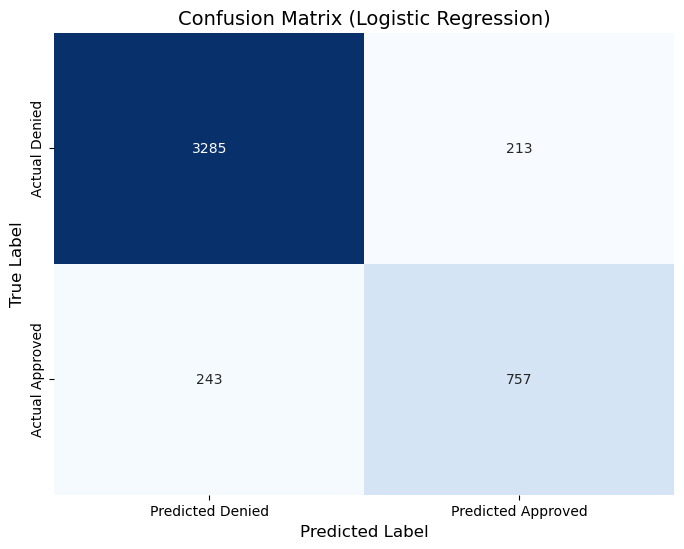

In [137]:
lr_cm = confusion_matrix(y_test, predictions_lr )
print(lr_cm)

# Define new labels: index 0 -> "Denied", index 1 -> "Approved"
labels = ['Denied', 'Approved']

# Plot the confusion matrix heatmap with the renamed labels
plt.figure(figsize=(8, 6))
sns.heatmap(lr_cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Denied", "Predicted Approved"],
            yticklabels=["Actual Denied", "Actual Approved"])
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.title("Confusion Matrix (Logistic Regression)", fontsize=14)
plt.show()

In [138]:
# Calculating the AUC-ROC | from one of the tutorials
lr_y_prob = reg_model_lr.predict_proba(X_test)[:, 1]

lr_auc_roc = roc_auc_score(y_test, lr_y_prob)
print(f"AUC-ROC: {lr_auc_roc:.4f}")

AUC-ROC: 0.9552


In [184]:
# Calculating the AUC-ROC | from one of the tutorials
lr2_y_prob = reg_model_lr2.predict_proba(X_test)[:, 1]

lr2_auc_roc = roc_auc_score(y_test, lr2_y_prob)
print(f"AUC-ROC: {lr2_auc_roc:.4f}")

AUC-ROC: 0.9552


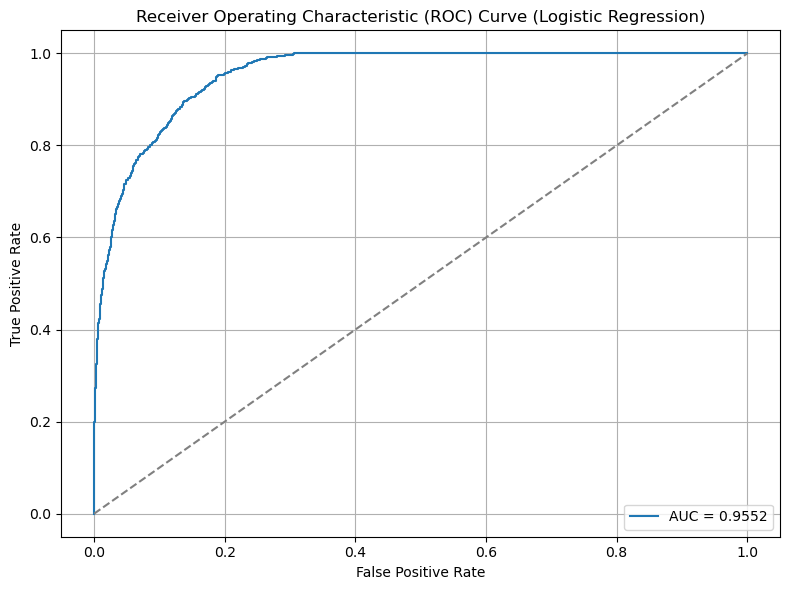

In [140]:
# From ChatGPT

# Get false positive rate, true positive rate and thresholds
fpr, tpr, thresholds = roc_curve(y_test, lr_y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {lr_auc_roc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Logistic Regression)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [141]:
# Setting Up 10-Fold Stratified Cross-Validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
dt_accuracy_scores = []

# Loop through each fold
for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_resampled, X_test = X.iloc[train_index], X.iloc[test_index]
    y_resampled, y_test = y.iloc[train_index], y.iloc[test_index]

    # --- Model Training ---
    dt_model = DecisionTreeClassifier(random_state=42)
    dt_model.fit(X_resampled, y_resampled)
    
    # Evaluate the model on the test data
    dt_accuracy = dt_model.score(X_test, y_test)
    dt_accuracy_scores.append(dt_accuracy)
    print(f"Fold {fold} Accuracy: {dt_accuracy:.4f}")
    
print(f"Average Accuracy: {sum(dt_accuracy_scores)/len(dt_accuracy_scores):.4f}")

Fold 1 Accuracy: 0.9029
Fold 2 Accuracy: 0.9111
Fold 3 Accuracy: 0.9089
Fold 4 Accuracy: 0.8929
Fold 5 Accuracy: 0.9004
Fold 6 Accuracy: 0.8991
Fold 7 Accuracy: 0.9024
Fold 8 Accuracy: 0.9020
Fold 9 Accuracy: 0.8984
Fold 10 Accuracy: 0.8986
Average Accuracy: 0.9017


In [142]:
# Getting the predictions for the Decision Tree Model
predictions_dt = dt_model.predict(X_test)

In [143]:
# Compute the evaluation metrics
dt_precision = precision_score(y_test, predictions_dt)
dt_recall = recall_score (y_test, predictions_dt)
dt_f1 = f1_score(y_test, predictions_dt)

# Print out evaluation metrics
print(f"Average Accuracy: {sum(dt_accuracy_scores)/len(dt_accuracy_scores):.4f}")
print(f"Precision: {dt_precision:.4f}")
print(f"Recall: {dt_recall:.4f}")
print(f"F1-Score: {dt_f1:.4f}")

Average Accuracy: 0.9017
Precision: 0.7677
Recall: 0.7800
F1-Score: 0.7738


[[3262  236]
 [ 220  780]]


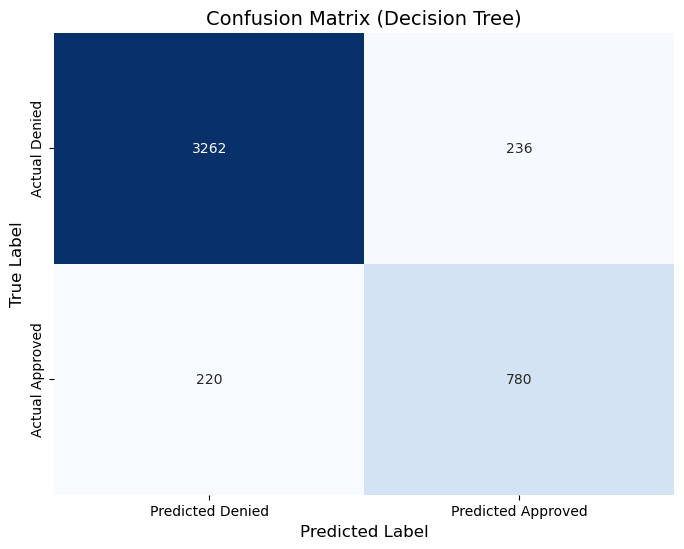

In [144]:
dt_cm = confusion_matrix(y_test, predictions_dt )
print(dt_cm)

# Define new labels: index 0 -> "Denied", index 1 -> "Approved"
labels = ['Denied', 'Approved']

# Plot the confusion matrix heatmap with the renamed labels
plt.figure(figsize=(8, 6))
sns.heatmap(dt_cm, annot=True, fmt="d", cmap="Blues",  cbar=False,
            xticklabels=["Predicted Denied", "Predicted Approved"],
            yticklabels=["Actual Denied", "Actual Approved"])
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.title("Confusion Matrix (Decision Tree)", fontsize=14)
plt.show()

In [145]:
# Calculating the AUC-ROC | from one of the tutorials
dt_y_prob = dt_model.predict_proba(X_test)[:, 1]

dt_auc_roc = roc_auc_score(y_test, dt_y_prob)
print(f"AUC-ROC: {dt_auc_roc:.4f}")

AUC-ROC: 0.8563


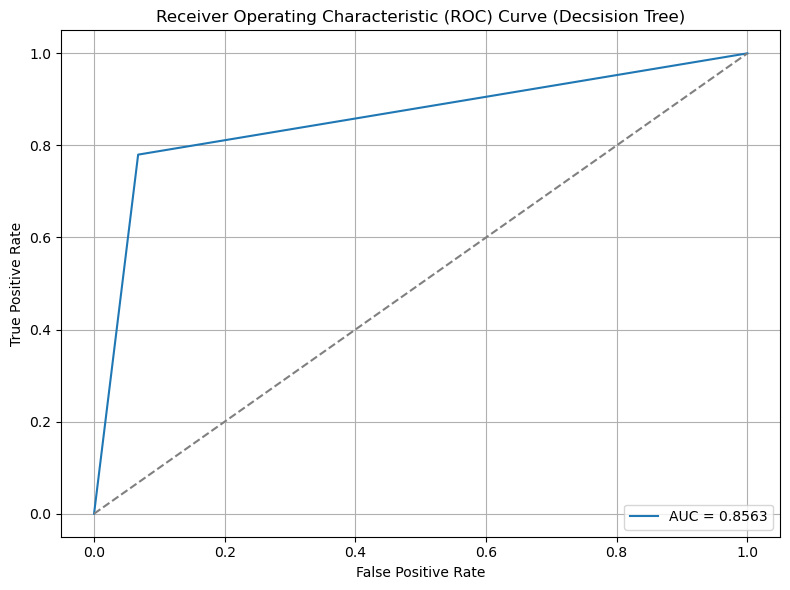

In [146]:
# From ChatGPT

# Get false positive rate, true positive rate and thresholds
fpr, tpr, thresholds = roc_curve(y_test, dt_y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {dt_auc_roc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Decsision Tree)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [147]:
# Setting Up 10-Fold Stratified Cross-Validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
rf_accuracy_scores = []

# Loop through each fold
for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_resampled, X_test = X.iloc[train_index], X.iloc[test_index]
    y_resampled, y_test = y.iloc[train_index], y.iloc[test_index]

    # --- Model Training ---
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_resampled, y_resampled)
    
    # Evaluate the model on the test data
    rf_accuracy = rf_model.score(X_test, y_test)
    rf_accuracy_scores.append(rf_accuracy)
    print(f"Fold {fold} Accuracy: {rf_accuracy:.4f}")
    
print(f"Average Accuracy: {sum(rf_accuracy_scores)/len(rf_accuracy_scores):.4f}")

Fold 1 Accuracy: 0.9249
Fold 2 Accuracy: 0.9349
Fold 3 Accuracy: 0.9307
Fold 4 Accuracy: 0.9275
Fold 5 Accuracy: 0.9280
Fold 6 Accuracy: 0.9340
Fold 7 Accuracy: 0.9311
Fold 8 Accuracy: 0.9293
Fold 9 Accuracy: 0.9273
Fold 10 Accuracy: 0.9289
Average Accuracy: 0.9296


In [148]:
# Setting Up 10-Fold Stratified Cross-Validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
rf2_accuracy_scores = []

# Loop through each fold
for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_resampled, X_test = X.iloc[train_index], X.iloc[test_index]
    y_resampled, y_test = y.iloc[train_index], y.iloc[test_index]

    # --- Model Training ---
    rf2_model = RandomForestClassifier(n_estimators=200, 
                                       random_state=42, 
                                       max_depth=8,
                                       min_samples_split=5,
                                       min_samples_leaf=2,
                                       max_features='sqrt',
                                       bootstrap=True)
    rf2_model.fit(X_resampled, y_resampled)
    
    # Evaluate the model on the test data
    rf2_accuracy = rf2_model.score(X_test, y_test)
    rf2_accuracy_scores.append(rf2_accuracy)
    print(f"Fold {fold} Accuracy: {rf2_accuracy:.4f}")
    
print(f"Average Accuracy: {sum(rf2_accuracy_scores)/len(rf2_accuracy_scores):.4f}")

Fold 1 Accuracy: 0.9224
Fold 2 Accuracy: 0.9262
Fold 3 Accuracy: 0.9193
Fold 4 Accuracy: 0.9193
Fold 5 Accuracy: 0.9206
Fold 6 Accuracy: 0.9231
Fold 7 Accuracy: 0.9173
Fold 8 Accuracy: 0.9202
Fold 9 Accuracy: 0.9215
Fold 10 Accuracy: 0.9240
Average Accuracy: 0.9214


In [149]:
# Setting Up 10-Fold Stratified Cross-Validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
rf3_accuracy_scores = []

# Loop through each fold
for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_resampled, X_test = X.iloc[train_index], X.iloc[test_index]
    y_resampled, y_test = y.iloc[train_index], y.iloc[test_index]

    # --- Model Training ---
    rf3_model = RandomForestClassifier(n_estimators=200, 
                                       random_state=42, 
                                       max_depth=8,
                                       min_samples_split=5,
                                       min_samples_leaf=2,
                                       max_features='sqrt',
                                       bootstrap=False)
    rf3_model.fit(X_resampled, y_resampled)
    
    # Evaluate the model on the test data
    rf3_accuracy = rf3_model.score(X_test, y_test)
    rf3_accuracy_scores.append(rf3_accuracy)
    print(f"Fold {fold} Accuracy: {rf3_accuracy:.4f}")
    
print(f"Average Accuracy: {sum(rf3_accuracy_scores)/len(rf3_accuracy_scores):.4f}")

Fold 1 Accuracy: 0.9204
Fold 2 Accuracy: 0.9255
Fold 3 Accuracy: 0.9193
Fold 4 Accuracy: 0.9182
Fold 5 Accuracy: 0.9213
Fold 6 Accuracy: 0.9235
Fold 7 Accuracy: 0.9175
Fold 8 Accuracy: 0.9222
Fold 9 Accuracy: 0.9220
Fold 10 Accuracy: 0.9240
Average Accuracy: 0.9214


In [150]:
# Getting the predictions for the Logistic Regression Model
predictions_rf = rf_model.predict(X_test)

In [151]:
# Getting the predictions for the Logistic Regression Model
predictions_rf2 = rf2_model.predict(X_test)

In [152]:
# Getting the predictions for the Logistic Regression Model
predictions_rf3 = rf3_model.predict(X_test)

In [153]:
# Compute the evaluation metrics
rf_precision = precision_score(y_test, predictions_rf)
rf_recall = recall_score (y_test, predictions_rf)
rf_f1 = f1_score(y_test, predictions_rf)

# Print out evaluation metrics
print(f"Average Accuracy: {sum(rf_accuracy_scores)/len(rf_accuracy_scores):.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1-Score: {rf_f1:.4f}")

Average Accuracy: 0.9296
Precision: 0.8972
Recall: 0.7680
F1-Score: 0.8276


In [154]:
# Compute the evaluation metrics
rf2_precision = precision_score(y_test, predictions_rf2)
rf2_recall = recall_score (y_test, predictions_rf2)
rf2_f1 = f1_score(y_test, predictions_rf2)

# Print out evaluation metrics
print(f"Average Accuracy: {sum(rf2_accuracy_scores)/len(rf2_accuracy_scores):.4f}")
print(f"Precision: {rf2_precision:.4f}")
print(f"Recall: {rf2_recall:.4f}")
print(f"F1-Score: {rf2_f1:.4f}")

Average Accuracy: 0.9214
Precision: 0.9175
Recall: 0.7230
F1-Score: 0.8087


In [155]:
# Compute the evaluation metrics
rf3_precision = precision_score(y_test, predictions_rf3)
rf3_recall = recall_score (y_test, predictions_rf3)
rf3_f1 = f1_score(y_test, predictions_rf3)

# Print out evaluation metrics
print(f"Average Accuracy: {sum(rf3_accuracy_scores)/len(rf3_accuracy_scores):.4f}")
print(f"Precision: {rf3_precision:.4f}")
print(f"Recall: {rf3_recall:.4f}")
print(f"F1-Score: {rf3_f1:.4f}")

Average Accuracy: 0.9214
Precision: 0.9218
Recall: 0.7190
F1-Score: 0.8079


[[3410   88]
 [ 232  768]]


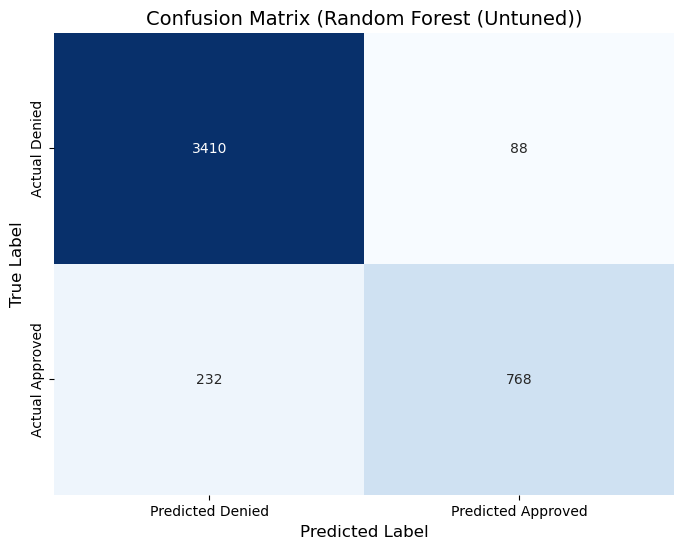

In [156]:
rf_cm = confusion_matrix(y_test, predictions_rf)
print(rf_cm)

# Define new labels: index 0 -> "Denied", index 1 -> "Approved"
labels = ['Denied', 'Approved']

# Plot the confusion matrix heatmap with the renamed labels
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Denied", "Predicted Approved"],
            yticklabels=["Actual Denied", "Actual Approved"])
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.title("Confusion Matrix (Random Forest (Untuned))", fontsize=14)
plt.show()

[[3433   65]
 [ 277  723]]


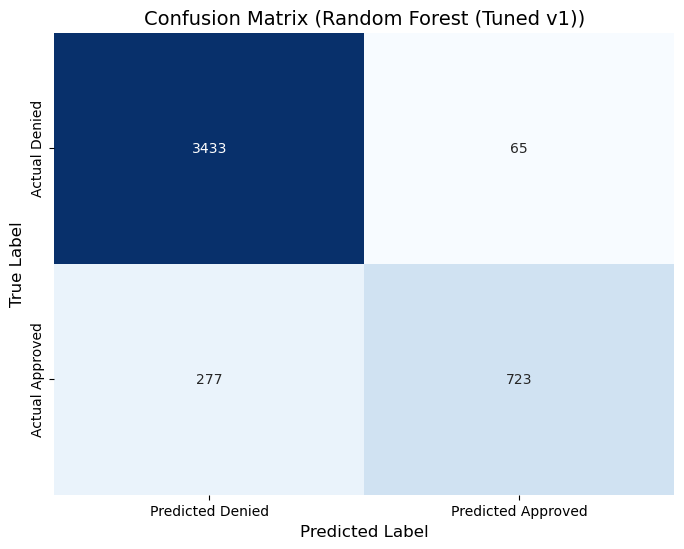

In [157]:
rf2_cm = confusion_matrix(y_test, predictions_rf2)
print(rf2_cm)

# Define new labels: index 0 -> "Denied", index 1 -> "Approved"
labels = ['Denied', 'Approved']

# Plot the confusion matrix heatmap with the renamed labels
plt.figure(figsize=(8, 6))
sns.heatmap(rf2_cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Denied", "Predicted Approved"],
            yticklabels=["Actual Denied", "Actual Approved"])
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.title("Confusion Matrix (Random Forest (Tuned v1))", fontsize=14)
plt.show()

[[3433   65]
 [ 277  723]]


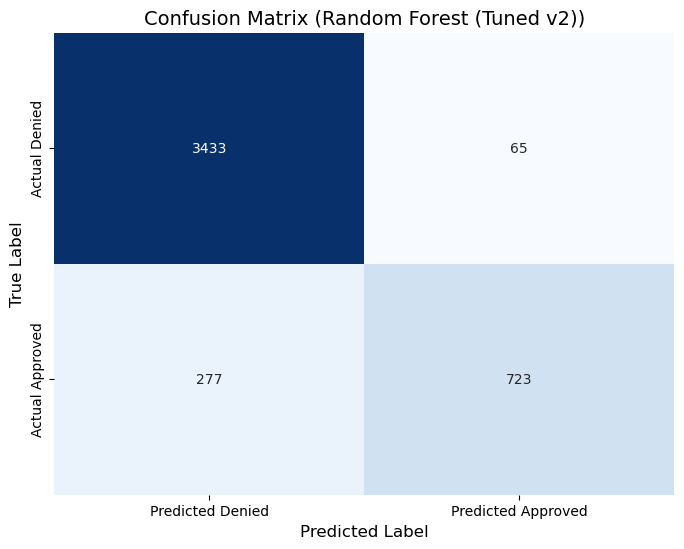

In [158]:
rf3_cm = confusion_matrix(y_test, predictions_rf2)
print(rf3_cm)

# Define new labels: index 0 -> "Denied", index 1 -> "Approved"
labels = ['Denied', 'Approved']

# Plot the confusion matrix heatmap with the renamed labels
plt.figure(figsize=(8, 6))
sns.heatmap(rf3_cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Denied", "Predicted Approved"],
            yticklabels=["Actual Denied", "Actual Approved"])
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.title("Confusion Matrix (Random Forest (Tuned v2))", fontsize=14)
plt.show()

In [159]:
# Calculating the AUC-ROC | from one of the tutorials
rf_y_prob = rf_model.predict_proba(X_test)[:, 1]

rf_auc_roc = roc_auc_score(y_test, rf_y_prob)
print(f"AUC-ROC: {rf_auc_roc:.4f}")

AUC-ROC: 0.9747


In [160]:
# Calculating the AUC-ROC | from one of the tutorials
rf2_y_prob = rf2_model.predict_proba(X_test)[:, 1]

rf2_auc_roc = roc_auc_score(y_test, rf2_y_prob)
print(f"AUC-ROC: {rf2_auc_roc:.4f}")

AUC-ROC: 0.9683


In [161]:
# Calculating the AUC-ROC | from one of the tutorials
rf3_y_prob = rf3_model.predict_proba(X_test)[:, 1]

rf3_auc_roc = roc_auc_score(y_test, rf3_y_prob)
print(f"AUC-ROC: {rf3_auc_roc:.4f}")

AUC-ROC: 0.9684


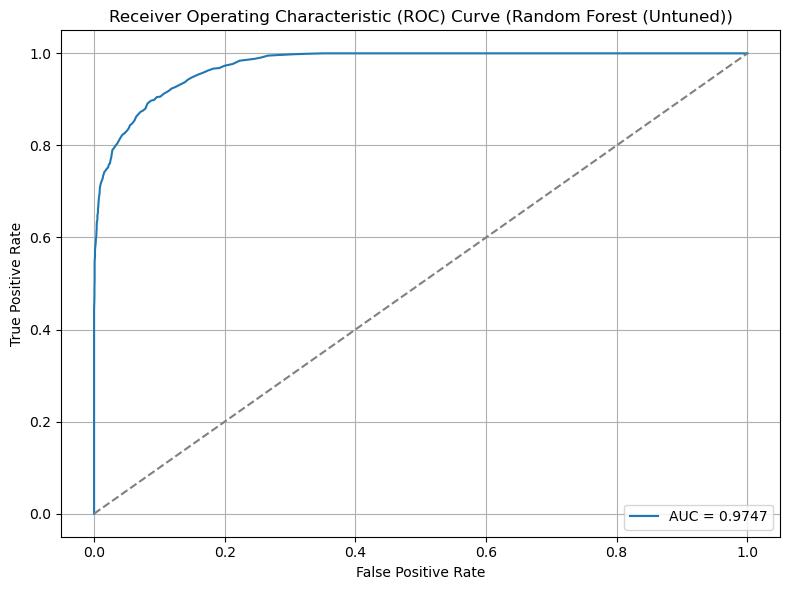

In [162]:
# From ChatGPT

# Get false positive rate, true positive rate and thresholds
fpr, tpr, thresholds = roc_curve(y_test, rf_y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {rf_auc_roc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Random Forest (Untuned))')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

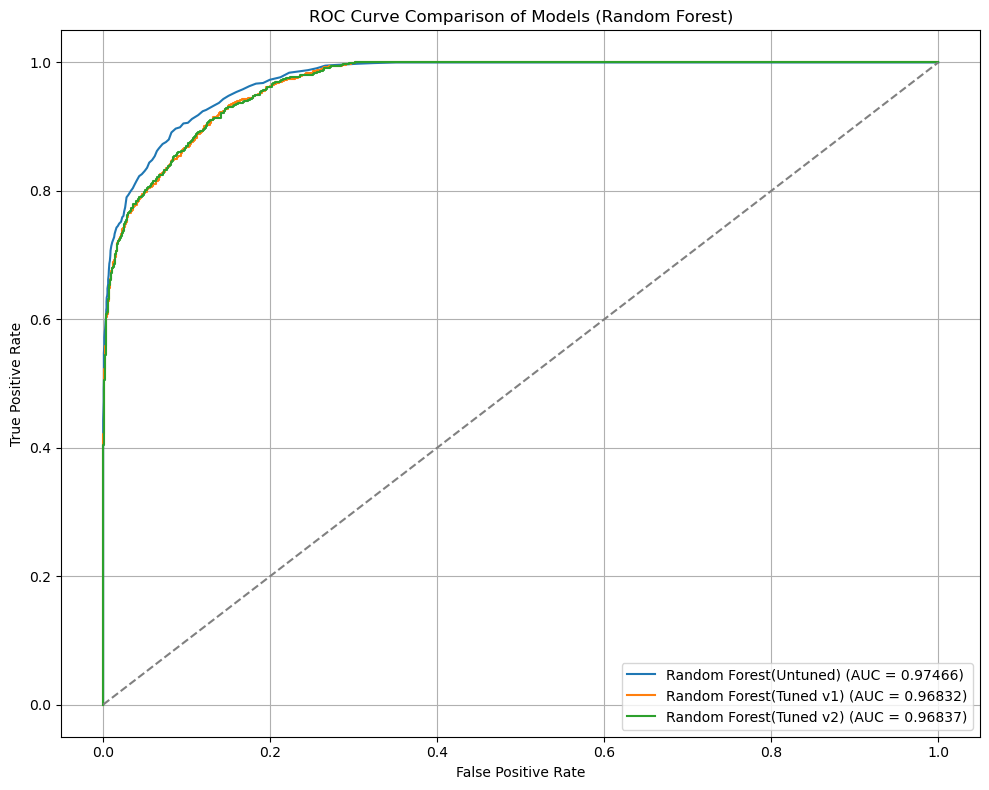

In [163]:
# Dictionary of model names and predicted probabilities
models_probs = {
    "Random Forest(Untuned)": rf_y_prob,
    "Random Forest(Tuned v1)": rf2_y_prob,
    "Random Forest(Tuned v2)": rf3_y_prob
}

plt.figure(figsize=(10, 8))

# Plot each ROC curve
for name, probs in models_probs.items():
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.5f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison of Models (Random Forest)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [164]:
# Setting Up 10-Fold Stratified Cross-Validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
xgb_accuracy_scores = []

# Loop through each fold
for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_resampled, X_test = X.iloc[train_index], X.iloc[test_index]
    y_resampled, y_test = y.iloc[train_index], y.iloc[test_index]

    # --- Model Training ---
    xgb_model = XGBClassifier(
        n_estimators=100,
        learning_rate=0.1,
        eval_metric='logloss',
        random_state=42
    )
    xgb_model.fit(X_train, y_train)
    
    # Evaluate the model on the test data
    xgb_accuracy = xgb_model.score(X_test, y_test)
    xgb_accuracy_scores.append(xgb_accuracy)
    print(f"Fold {fold} Accuracy: {xgb_accuracy:.4f}")
    
print(f"Average Accuracy: {sum(xgb_accuracy_scores)/len(xgb_accuracy_scores):.4f}")

Fold 1 Accuracy: 0.9355
Fold 2 Accuracy: 0.9413
Fold 3 Accuracy: 0.9382
Fold 4 Accuracy: 0.9378
Fold 5 Accuracy: 0.9353
Fold 6 Accuracy: 0.9426
Fold 7 Accuracy: 0.9360
Fold 8 Accuracy: 0.9360
Fold 9 Accuracy: 0.9373
Fold 10 Accuracy: 0.9353
Average Accuracy: 0.9375


In [165]:
# Setting Up 10-Fold Stratified Cross-Validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
xgb2_accuracy_scores = []

# Loop through each fold
for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_resampled, X_test = X.iloc[train_index], X.iloc[test_index]
    y_resampled, y_test = y.iloc[train_index], y.iloc[test_index]

    # --- Model Training ---
    xgb2_model = XGBClassifier(
        n_estimators=100,
        max_depth=8,
        learning_rate=0.1,
        eval_metric='logloss',
        random_state=42
    )
    xgb2_model.fit(X_train, y_train)
    
    # Evaluate the model on the test data
    xgb2_accuracy = xgb2_model.score(X_test, y_test)
    xgb2_accuracy_scores.append(xgb2_accuracy)
    print(f"Fold {fold} Accuracy: {xgb2_accuracy:.4f}")
    
print(f"Average Accuracy: {sum(xgb2_accuracy_scores)/len(xgb2_accuracy_scores):.4f}")

Fold 1 Accuracy: 0.9444
Fold 2 Accuracy: 0.9529
Fold 3 Accuracy: 0.9498
Fold 4 Accuracy: 0.9482
Fold 5 Accuracy: 0.9495
Fold 6 Accuracy: 0.9531
Fold 7 Accuracy: 0.9480
Fold 8 Accuracy: 0.9453
Fold 9 Accuracy: 0.9471
Fold 10 Accuracy: 0.9478
Average Accuracy: 0.9486


In [166]:
# Getting the predictions for the Logistic Regression Model
predictions_xgb = xgb_model.predict(X_test)

In [167]:
# Getting the predictions for the Logistic Regression Model
predictions_xgb2 = xgb2_model.predict(X_test)

In [168]:
# Compute the evaluation metrics
xgb_precision = precision_score(y_test, predictions_xgb)
xgb_recall = recall_score (y_test, predictions_xgb)
xgb_f1 = f1_score(y_test, predictions_xgb)

# Print out evaluation metrics
print(f"Average Accuracy: {sum(xgb_accuracy_scores)/len(xgb_accuracy_scores):.4f}")
print(f"Precision: {xgb_precision:.4f}")
print(f"Recall: {xgb_recall:.4f}")
print(f"F1-Score: {xgb_f1:.4f}")

Average Accuracy: 0.9375
Precision: 0.9098
Recall: 0.7870
F1-Score: 0.8440


In [169]:
# Compute the evaluation metrics
xgb2_precision = precision_score(y_test, predictions_xgb2)
xgb2_recall = recall_score (y_test, predictions_xgb2)
xgb2_f1 = f1_score(y_test, predictions_xgb2)

# Print out evaluation metrics
print(f"Average Accuracy: {sum(xgb2_accuracy_scores)/len(xgb2_accuracy_scores):.4f}")
print(f"Precision: {xgb2_precision:.4f}")
print(f"Recall: {xgb2_recall:.4f}")
print(f"F1-Score: {xgb2_f1:.4f}")

Average Accuracy: 0.9486
Precision: 0.9332
Recall: 0.8240
F1-Score: 0.8752


[[3420   78]
 [ 213  787]]


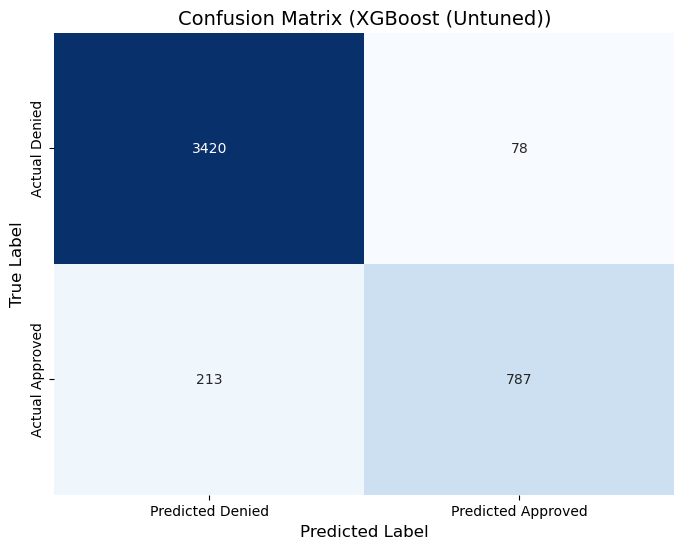

In [170]:
xgb_cm = confusion_matrix(y_test, predictions_xgb)
print(xgb_cm)

# Define new labels: index 0 -> "Denied", index 1 -> "Approved"
labels = ['Denied', 'Approved']

# Plot the confusion matrix heatmap with the renamed labels
plt.figure(figsize=(8, 6))
sns.heatmap(xgb_cm, annot=True, fmt="d", cmap="Blues",  cbar=False,
            xticklabels=["Predicted Denied", "Predicted Approved"],
            yticklabels=["Actual Denied", "Actual Approved"])
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.title("Confusion Matrix (XGBoost (Untuned))", fontsize=14)
plt.show()

[[3439   59]
 [ 176  824]]


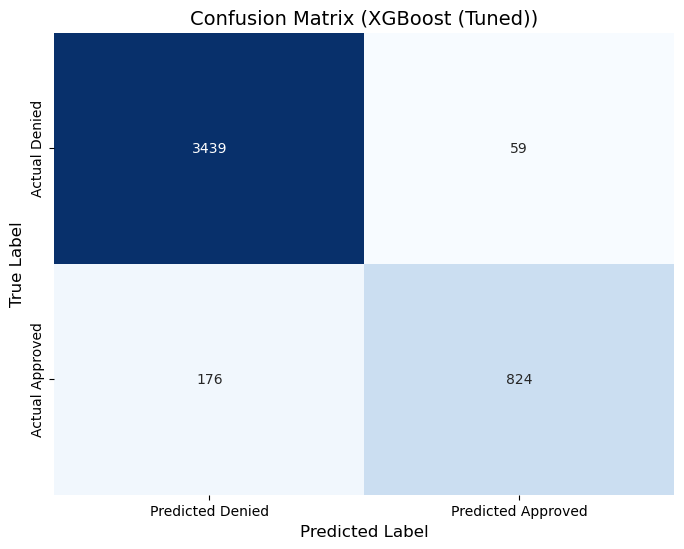

In [171]:
xgb2_cm = confusion_matrix(y_test, predictions_xgb2)
print(xgb2_cm)

# Define new labels: index 0 -> "Denied", index 1 -> "Approved"
labels = ['Denied', 'Approved']

# Plot the confusion matrix heatmap with the renamed labels
plt.figure(figsize=(8, 6))
sns.heatmap(xgb2_cm, annot=True, fmt="d", cmap="Blues",  cbar=False,
            xticklabels=["Predicted Denied", "Predicted Approved"],
            yticklabels=["Actual Denied", "Actual Approved"])
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.title("Confusion Matrix (XGBoost (Tuned))", fontsize=14)
plt.show()

In [172]:
# Calculating the AUC-ROC | from one of the tutorials
xgb_y_prob = xgb_model.predict_proba(X_test)[:, 1]

xgb_auc_roc = roc_auc_score(y_test, xgb_y_prob)
print(f"AUC-ROC: {xgb_auc_roc:.4f}")

AUC-ROC: 0.9810


In [173]:
# Calculating the AUC-ROC | from one of the tutorials
xgb2_y_prob = xgb2_model.predict_proba(X_test)[:, 1]

xgb2_auc_roc = roc_auc_score(y_test, xgb2_y_prob)
print(f"AUC-ROC: {xgb2_auc_roc:.4f}")

AUC-ROC: 0.9868


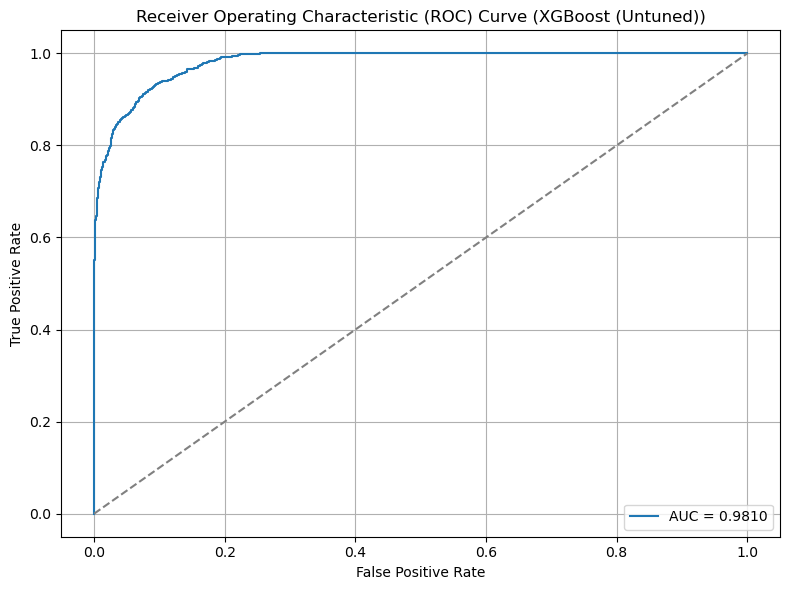

In [174]:
# From ChatGPT

# Get false positive rate, true positive rate and thresholds
fpr, tpr, thresholds = roc_curve(y_test, xgb_y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {xgb_auc_roc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (XGBoost (Untuned))')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

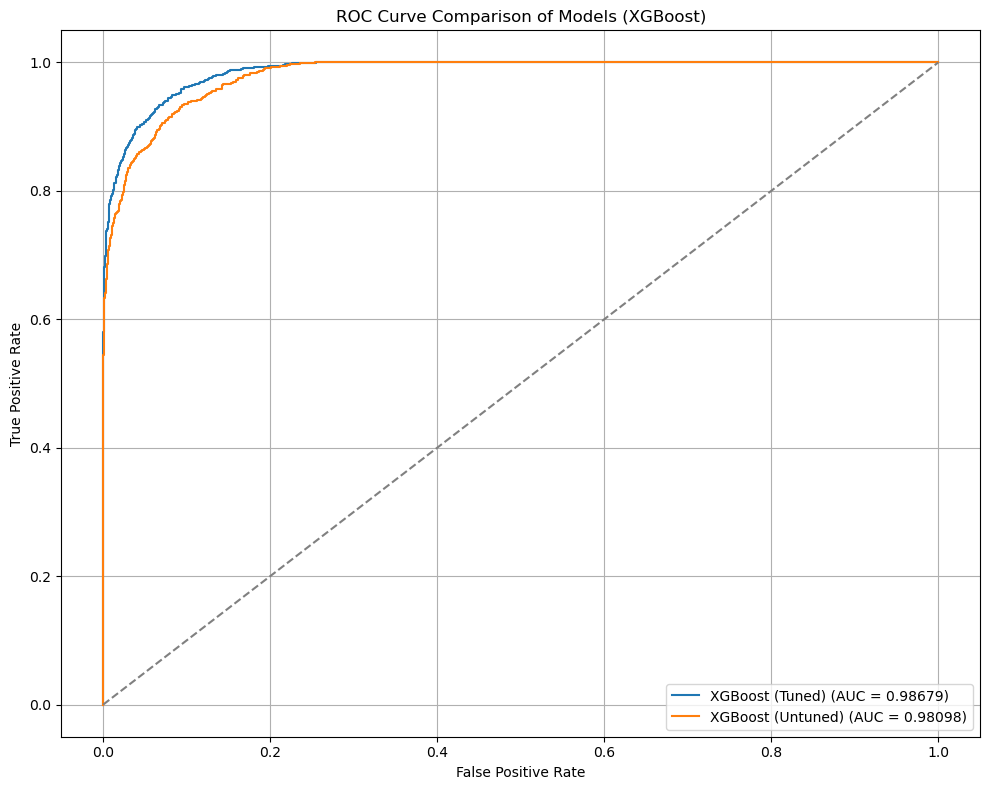

In [175]:
# Dictionary of model names and predicted probabilities
models_probs = {
    "XGBoost (Tuned)": xgb2_y_prob,
    "XGBoost (Untuned)": xgb_y_prob,
}

plt.figure(figsize=(10, 8))

# Plot each ROC curve
for name, probs in models_probs.items():
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.5f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison of Models (XGBoost)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [176]:
# Setting Up 10-Fold Stratified Cross-Validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
knn_accuracy_scores = []

# Loop through each fold
for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_resampled, X_test = X.iloc[train_index], X.iloc[test_index]
    y_resampled, y_test = y.iloc[train_index], y.iloc[test_index]

    # --- Model Training ---
    knn_model = KNeighborsClassifier(
        n_neighbors=2, 
        weights='uniform', 
        algorithm='auto', 
        leaf_size=30, 
        metric='minkowski'
    )
    knn_model.fit(X_train, y_train)
    
    # Evaluate the model on the test data
    knn_accuracy = knn_model.score(X_test, y_test)
    knn_accuracy_scores.append(knn_accuracy)
    print(f"Fold {fold} Accuracy: {knn_accuracy:.4f}")
    
print(f"Average Accuracy: {sum(knn_accuracy_scores)/len(knn_accuracy_scores):.4f}")

Fold 1 Accuracy: 0.8735
Fold 2 Accuracy: 0.8629
Fold 3 Accuracy: 0.8702
Fold 4 Accuracy: 0.8675
Fold 5 Accuracy: 0.8649
Fold 6 Accuracy: 0.8722
Fold 7 Accuracy: 0.8688
Fold 8 Accuracy: 0.8684
Fold 9 Accuracy: 0.8686
Fold 10 Accuracy: 0.8610
Average Accuracy: 0.8678


In [177]:
# Getting the predictions for the Logistic Regression Model
predictions_knn = knn_model.predict(X_test)

In [178]:
# Compute the evaluation metrics
knn_precision = precision_score(y_test, predictions_knn)
knn_recall = recall_score (y_test, predictions_knn)
knn_f1 = f1_score(y_test, predictions_knn)

# Print out evaluation metrics
print(f"Average Accuracy: {sum(knn_accuracy_scores)/len(xgb_accuracy_scores):.4f}")
print(f"Precision: {knn_precision:.4f}")
print(f"Recall: {knn_recall:.4f}")
print(f"F1-Score: {knn_f1:.4f}")

Average Accuracy: 0.8678
Precision: 0.8947
Recall: 0.4250
F1-Score: 0.5763


[[3448   50]
 [ 575  425]]


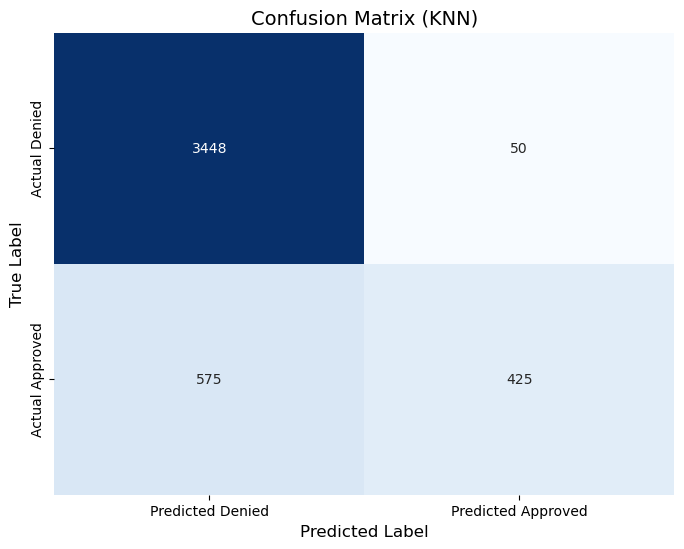

In [179]:
knn_cm = confusion_matrix(y_test, predictions_knn)
print(knn_cm)

# Define new labels: index 0 -> "Denied", index 1 -> "Approved"
labels = ['Denied', 'Approved']

# Plot the confusion matrix heatmap with the renamed labels
plt.figure(figsize=(8, 6))
sns.heatmap(knn_cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Denied", "Predicted Approved"],
            yticklabels=["Actual Denied", "Actual Approved"])
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.title("Confusion Matrix (KNN)", fontsize=14)
plt.show()

In [180]:
# Calculating the AUC-ROC | from one of the tutorials
knn_y_prob = knn_model.predict_proba(X_test)[:, 1]

knn_auc_roc = roc_auc_score(y_test, knn_y_prob)
print(f"AUC-ROC: {knn_auc_roc:.4f}")

AUC-ROC: 0.8882


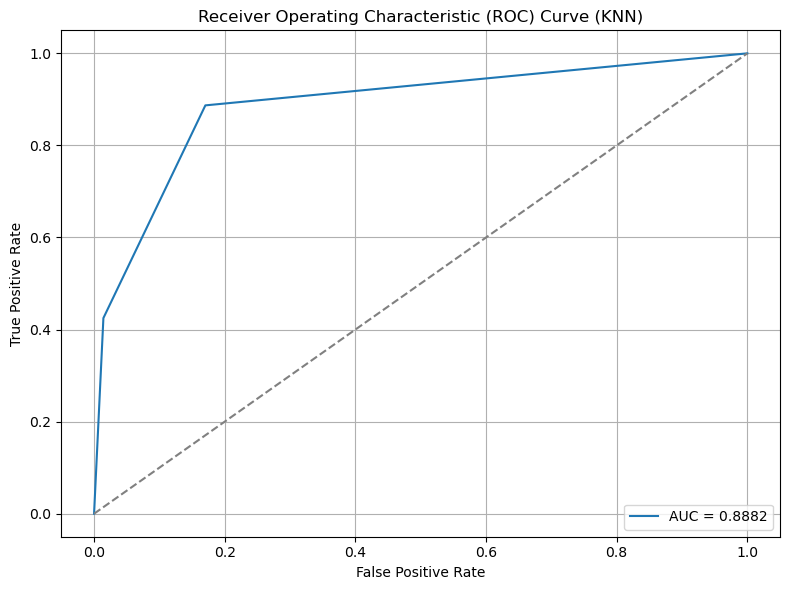

In [181]:
# Get false positive rate, true positive rate and thresholds
fpr, tpr, thresholds = roc_curve(y_test, knn_y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {knn_auc_roc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (KNN)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

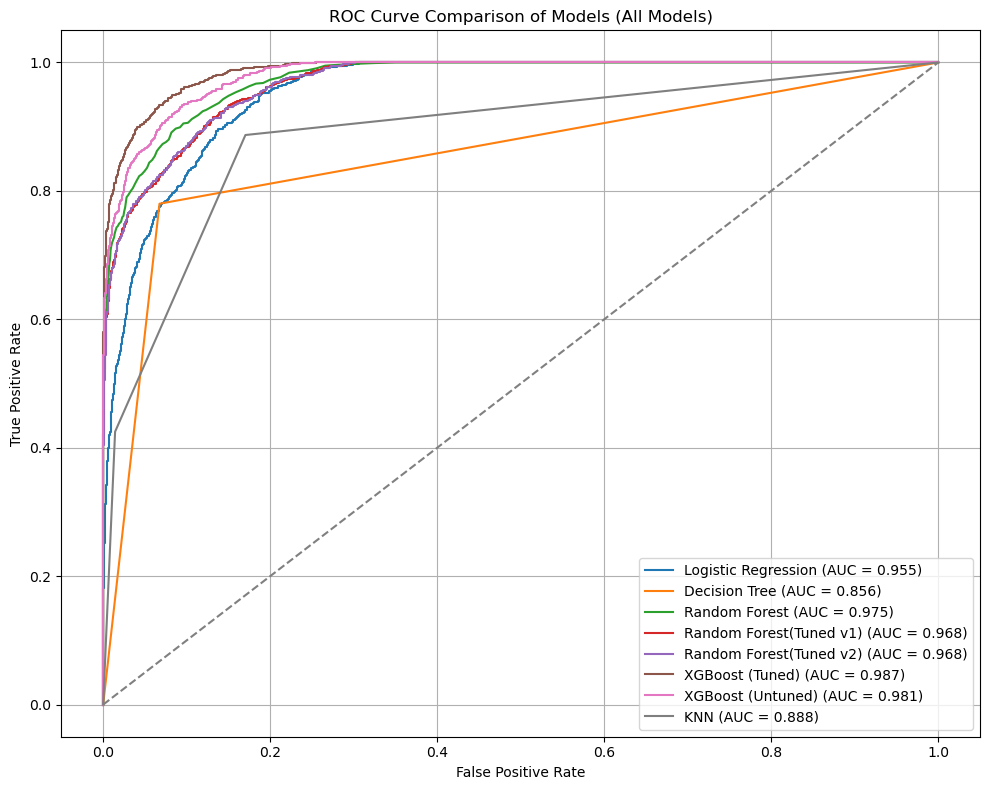

In [182]:

# Dictionary of model names and predicted probabilities
models_probs = {
    "Logistic Regression": lr_y_prob,
    "Decision Tree": dt_y_prob,
    "Random Forest": rf_y_prob,
    "Random Forest(Tuned v1)": rf2_y_prob,
    "Random Forest(Tuned v2)": rf3_y_prob,
    "XGBoost (Tuned)": xgb2_y_prob,
    "XGBoost (Untuned)": xgb_y_prob,
    "KNN": knn_y_prob

}

plt.figure(figsize=(10, 8))

# Plot each ROC curve
for name, probs in models_probs.items():
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison of Models (All Models)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [186]:
# Print out all evaluation metrics
print("Logistic Regression (Untuned) Model Evaluation Metrics:")
print(f"Average Accuracy: {sum(lr_accuracy_scores)/len(lr_accuracy_scores):.4f}")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall: {lr_recall:.4f}")
print(f"F1-Score: {lr_f1:.4f}")
print(f"AUC-ROC: {lr_auc_roc:.4f}")

print("  ")
print("Logistic Regression (Tuned) Model Evaluation Metrics:")
print(f"Average Accuracy: {sum(lr2_accuracy_scores)/len(lr2_accuracy_scores):.4f}")
print(f"Precision: {lr2_precision:.4f}")
print(f"Recall: {lr2_recall:.4f}")
print(f"F1-Score: {lr2_f1:.4f}")
print(f"AUC-ROC: {lr2_auc_roc:.4f}")

print("  ")
print("Decision Tree Model Evaluation Metrics:")
print(f"Average Accuracy: {sum(dt_accuracy_scores)/len(dt_accuracy_scores):.4f}")
print(f"Precision: {dt_precision:.4f}")
print(f"Recall: {dt_recall:.4f}")
print(f"F1-Score: {dt_f1:.4f}")
print(f"AUC-ROC: {dt_auc_roc:.4f}")

print("  ")
print("Random Forest (Untuned) Model Evaluation Metrics:")
print(f"Average Accuracy: {sum(rf_accuracy_scores)/len(rf_accuracy_scores):.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1-Score: {rf_f1:.4f}")
print(f"AUC-ROC: {rf_auc_roc:.4f}")

print("  ")
print("Random Forest (Tuned v1) Model Evaluation Metrics:")
print(f"Average Accuracy: {sum(rf2_accuracy_scores)/len(rf2_accuracy_scores):.4f}")
print(f"Precision: {rf2_precision:.4f}")
print(f"Recall: {rf2_recall:.4f}")
print(f"F1-Score: {rf2_f1:.4f}")
print(f"AUC-ROC: {rf2_auc_roc:.4f}")

print( "  ")
print("Random Forest (Tuned v2) Model Evaluation Metrics:")
print(f"Average Accuracy: {sum(rf3_accuracy_scores)/len(rf3_accuracy_scores):.4f}")
print(f"Precision: {rf3_precision:.4f}")
print(f"Recall: {rf3_recall:.4f}")
print(f"F1-Score: {rf3_f1:.4f}")
print(f"AUC-ROC: {rf3_auc_roc:.4f}")

print("  ")
print("XGBoost (Untuned) Model Evaluation Metrics:")
print(f"Average Accuracy: {sum(xgb_accuracy_scores)/len(xgb_accuracy_scores):.4f}")
print(f"Precision: {xgb_precision:.4f}")
print(f"Recall: {xgb_recall:.4f}")
print(f"F1-Score: {xgb_f1:.4f}")
print(f"AUC-ROC: {xgb_auc_roc:.4f}")

print("  ")
print("XGBoost (Tuned) Model Evaluation Metrics:")
print(f"Average Accuracy: {sum(xgb2_accuracy_scores)/len(xgb2_accuracy_scores):.4f}")
print(f"Precision: {xgb2_precision:.4f}")
print(f"Recall: {xgb2_recall:.4f}")
print(f"F1-Score: {xgb2_f1:.4f}")
print(f"AUC-ROC: {xgb2_auc_roc:.4f}")

print("  ")
print("KNN Model Evaluation Metrics:")
print(f"Average Accuracy: {sum(knn_accuracy_scores)/len(xgb_accuracy_scores):.4f}")
print(f"Precision: {knn_precision:.4f}")
print(f"Recall: {knn_recall:.4f}")
print(f"F1-Score: {knn_f1:.4f}")
print(f"AUC-ROC: {knn_auc_roc:.4f}")

Logistic Regression (Untuned) Model Evaluation Metrics:
Average Accuracy: 0.8994
Precision: 0.7804
Recall: 0.7570
F1-Score: 0.7685
AUC-ROC: 0.9552
  
Logistic Regression (Tuned) Model Evaluation Metrics:
Average Accuracy: 0.8994
Precision: 0.7804
Recall: 0.7570
F1-Score: 0.7685
AUC-ROC: 0.9552
  
Decision Tree Model Evaluation Metrics:
Average Accuracy: 0.9017
Precision: 0.7677
Recall: 0.7800
F1-Score: 0.7738
AUC-ROC: 0.8563
  
Random Forest (Untuned) Model Evaluation Metrics:
Average Accuracy: 0.9296
Precision: 0.8972
Recall: 0.7680
F1-Score: 0.8276
AUC-ROC: 0.9747
  
Random Forest (Tuned v1) Model Evaluation Metrics:
Average Accuracy: 0.9214
Precision: 0.9175
Recall: 0.7230
F1-Score: 0.8087
AUC-ROC: 0.9683
  
Random Forest (Tuned v2) Model Evaluation Metrics:
Average Accuracy: 0.9214
Precision: 0.9218
Recall: 0.7190
F1-Score: 0.8079
AUC-ROC: 0.9684
  
XGBoost (Untuned) Model Evaluation Metrics:
Average Accuracy: 0.9375
Precision: 0.9098
Recall: 0.7870
F1-Score: 0.8440
AUC-ROC: 0.9810